In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='darkgrid')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_csv('sample_fico_new.csv')

C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (20,60,119,130,131,132,135,136,137,140,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data = data.drop(['Unnamed: 0'],1)

In [5]:
print("Total Records in the data is ",data.shape[0])
print("Total Features in the data is ",data.shape[1])

Total Records in the data is  214563
Total Features in the data is  150


In [6]:
data['loan_status'].value_counts()

Fully Paid            97892
Current               88025
Charged Off           25128
Late (31-120 days)     2116
In Grace Period        1000
Late (16-30 days)       401
Default                   1
Name: loan_status, dtype: int64

| Loan Status     | Explanation                                           |
| --------------- | ----------------------------------------------------- |
| Current         | Loan is up to date on all outstanding payments        |
| Fully Paid      | Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment                                                           |
| Default         | Loan has not been current for 121 days or more        |
| Charged Off     | Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance                          |
| In Grace Period | Loan is past due but within the 15-day grace period   |
| Late (16-30)    | Loan has not been current for 16 to 30 days           |
| Late (31-120)   | Loan has not been current for 31 to 120 days          |

>For this project, we don't care about the loan that is in Current status. Instead, we are more interested in whether the loan is Good or Bad. Here, we assume loan in Good status if it will be fully paid, and the loan in Bad status if it is Charged Off, Default, or Late (16-30 days, or 31-120 days). For loans that are in Grace Period, we will remove them from our data due to uncertainty.

In [7]:
data = data.loc[data['loan_status'].isin(['Fully Paid','Charged Off','Late (31-120 days)','Late (16-30 days)','Default'])]

In [8]:
data.shape

(125538, 150)

In [9]:
data['loan_status'].value_counts()

Fully Paid            97892
Charged Off           25128
Late (31-120 days)     2116
Late (16-30 days)       401
Default                   1
Name: loan_status, dtype: int64

>*  Now we Have to Convert them into **Defaulter and Non-Defaulter**

In [10]:
def target_converter(x):
    if x == 'Fully Paid':
        return 'Non-Defaulter'
    else:
        return 'Defaulter'

In [11]:
data['loan_status'] = data['loan_status'].apply(target_converter)
data['loan_status'].value_counts()

Non-Defaulter    97892
Defaulter        27646
Name: loan_status, dtype: int64

In [12]:
data = data.dropna(axis=1,how='all')
print(data.shape)

(125538, 149)


In [13]:
data_details =pd.DataFrame({'Null-counts':data.isnull().sum(),
                          'Null-value-Percentage':data.isnull().sum()/data.shape[0]*100,
                          'unique_values':data.nunique(),
                          'data_type': data.dtypes})
data_details = data_details.sort_values(by='Null-counts')
data_details

,Null-counts,Null-value-Percentage,unique_values,data_type
id,0,0.000000,125538,int64
tot_cur_bal,0,0.000000,99306,int64
tot_coll_amt,0,0.000000,4532,int64
acc_now_delinq,0,0.000000,5,int64
pub_rec_bankruptcies,0,0.000000,8,int64
tax_liens,0,0.000000,17,int64
tot_hi_cred_lim,0,0.000000,95811,int64
application_type,0,0.000000,2,object
pct_tl_nvr_dlq,0,0.000000,472,float64
policy_code,0,0.000000,1,int64


In [14]:
data_details.index.values

array(['id', 'tot_cur_bal', 'tot_coll_amt', 'acc_now_delinq',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'application_type', 'pct_tl_nvr_dlq', 'policy_code',
       'collections_12_mths_ex_med', 'last_fico_range_low',
       'last_fico_range_high', 'total_bc_limit', 'last_pymnt_amnt',
       'recoveries', 'total_rec_late_fee', 'total_bal_ex_mort',
       'num_tl_op_past_12m', 'num_tl_90g_dpd_24m', 'num_tl_30dpd',
       'num_actv_bc_tl', 'mort_acc', 'mo_sin_rcnt_tl',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op', 'delinq_amnt',
       'chargeoff_within_12_mths', 'acc_open_past_24mths',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'total_rev_hi_lim',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
       'num_rev_tl_bal_gt_0', 'num_sats', 'total_rec_int',
       'total_rec_prncp', 'collection_recovery_fee', 'total_pymnt',
       'total_pymnt_inv', 'url', 'pymnt_plan', 'loan_status', 'issue_d',
       'verification_status', 'annual_inc',

## 1. Drop columns which have high missing values ($\approx90\%$)

In [15]:
data = data.drop(['annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'settlement_date',
       'settlement_status', 'debt_settlement_flag_date',
       'settlement_amount', 'settlement_term', 'settlement_percentage',
       'sec_app_mort_acc', 'sec_app_fico_range_low',
       'sec_app_inq_last_6mths', 'sec_app_fico_range_high',
       'sec_app_collections_12_mths_ex_med', 'sec_app_open_acc',
       'sec_app_num_rev_accts', 'sec_app_earliest_cr_line',
       'sec_app_open_act_il', 'sec_app_chargeoff_within_12_mths',
       'revol_bal_joint', 'sec_app_revol_util', 'next_pymnt_d', 'desc',
       'sec_app_mths_since_last_major_derog',
       'hardship_last_payment_amount', 'hardship_payoff_balance_amount',
       'hardship_loan_status', 'hardship_dpd', 'payment_plan_start_date',
       'hardship_end_date', 'hardship_amount', 'deferral_term',
       'hardship_status', 'hardship_reason', 'hardship_type',
       'hardship_length', 'hardship_start_date',
       'orig_projected_additional_accrued_interest'],axis=1)

In [16]:
data.shape

(125538, 111)

## 2. Remove constant features

In [17]:
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [18]:
const_features = find_constant_features(data)
const_features

['policy_code']

In [19]:
data.drop(const_features, axis = 1, inplace = True)

In [20]:
data.shape

(125538, 110)

## 3.Drop duplicated Rows

In [21]:
data.drop_duplicates(inplace= True)
print(data.shape)

(125538, 110)


In [22]:
data.head(7)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,14480103,10000,10000,10000.0,36 months,12.99,336.90,B,B5,VP Operations,5 years,MORTGAGE,100000.0,Not Verified,Apr-14,Non-Defaulter,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,847xx,UT,20.60,1,Feb-97,675,679,2.0,5.0,69.0,27,2,8556,11.60%,41,f,0.0,0.0,11320.480000,11320.48,10000.00,1320.48,0.0,0.00,0.000,Jun-15,6940.78,Jul-15,764,760,0,NaN,Individual,0,0,665575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76300,NaN,NaN,NaN,5,24651.0,20259.0,15.3,0,0,206.0,198,13,8,2,13.0,NaN,2.0,5.0,0,2,3,7,7,28,10,11.0,3,26,0.0,0,0,1,97.5,0.0,1,1,796617,66089,23500,84317,N,N
1,34513582,18300,18300,18300.0,60 months,15.99,444.93,D,D2,NaN,NaN,OWN,51000.0,Source Verified,Nov-14,Defaulter,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,142xx,NY,17.68,0,Apr-78,675,679,0.0,NaN,73.0,18,1,7650,51%,48,w,0.0,0.0,16311.660000,16311.66,4573.84,4381.97,0.0,7355.85,1324.053,Aug-16,444.93,Aug-18,644,640,0,NaN,Individual,0,0,21354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000,NaN,NaN,NaN,7,1525.0,2462.0,75.6,0,0,131.0,439,4,4,0,4.0,NaN,4.0,NaN,0,6,7,8,19,15,17,33.0,7,18,0.0,0,0,3,100.0,50.0,1,0,30914,21354,10100,15914,N,Y
2,12144835,3600,3600,3600.0,36 months,17.57,129.38,D,D2,quaility control,6 years,RENT,45000.0,Not Verified,Feb-14,Non-Defaulter,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,561xx,MN,16.08,1,Aug-06,660,664,1.0,18.0,NaN,8,0,3631,80.70%,12,w,0.0,0.0,4657.369543,4657.37,3600.00,1057.37,0.0,0.00,0.000,Feb-17,129.07,Nov-18,629,625,0,18.0,Individual,0,0,26184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500,NaN,NaN,NaN,7,3273.0,869.0,80.7,0,0,90.0,67,12,6,0,12.0,60.0,3.0,60.0,2,4,4,3,5,7,4,5.0,4,7,0.0,0,1,2,90.9,75.0,0,0,28400,26184,4500,23900,N,N
3,16342368,13675,13675,13675.0,36 months,19.52,504.88,E,E2,Convention Services Coordinator,< 1 year,RENT,38000.0,Verified,Jun-14,Non-Defaulter,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,701xx,LA,19.08,0,Oct-97,660,664,0.0,72.0,NaN,6,0,23290,89.90%,21,f,0.0,0.0,17496.870020,17496.87,13675.00,3821.87,0.0,0.00,0.000,Apr-16,6835.01,Jun-19,714,710,0,NaN,Individual,0,0,23290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25900,NaN,NaN,NaN,1,3882.0,665.0,95.6,0,0,54.0,199,13,13,0,13.0,72.0,17.0,72.0,0,4,6,4,12,1,6,20.0,6,6,0.0,0,0,0,95.2,100.0,0,0,25900,23290,15200,0,N,N
4,12846125,14400,14400,1440

## 4.Inspect the features Manually

In [23]:
df = data.copy()

In [24]:
features_to_be_removed = []

In [25]:

def plot_feature(col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=True, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)
    

    # Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

In [26]:
data_details =pd.DataFrame({'Null-counts':data.isnull().sum(),
                          'Null-value-Percentage':data.isnull().sum()/data.shape[0]*100,
                          'unique_values':data.nunique(),
                          'data_type': data.dtypes})
data_details

,Null-counts,Null-value-Percentage,unique_values,data_type
id,0,0.000000,125538,int64
loan_amnt,0,0.000000,1429,int64
funded_amnt,0,0.000000,1429,int64
funded_amnt_inv,0,0.000000,1442,float64
term,0,0.000000,2,object
int_rate,0,0.000000,315,float64
installment,0,0.000000,30247,float64
grade,0,0.000000,7,object
sub_grade,0,0.000000,35,object
emp_title,8249,6.570919,44613,object


### Features 0 to 10

In [27]:
df.iloc[0:5,0:11]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length
0,14480103,10000,10000,10000.0,36 months,12.99,336.90,B,B5,VP Operations,5 years
1,34513582,18300,18300,18300.0,60 months,15.99,444.93,D,D2,NaN,NaN
2,12144835,3600,3600,3600.0,36 months,17.57,129.38,D,D2,quaility control,6 years
3,16342368,13675,13675,13675.0,36 months,19.52,504.88,E,E2,Convention Services Coordinator,< 1 year
4,12846125,14400,14400,14400.0,36 months,14.16,493.28,C,C2,Manufacturing Supervisor,< 1 year


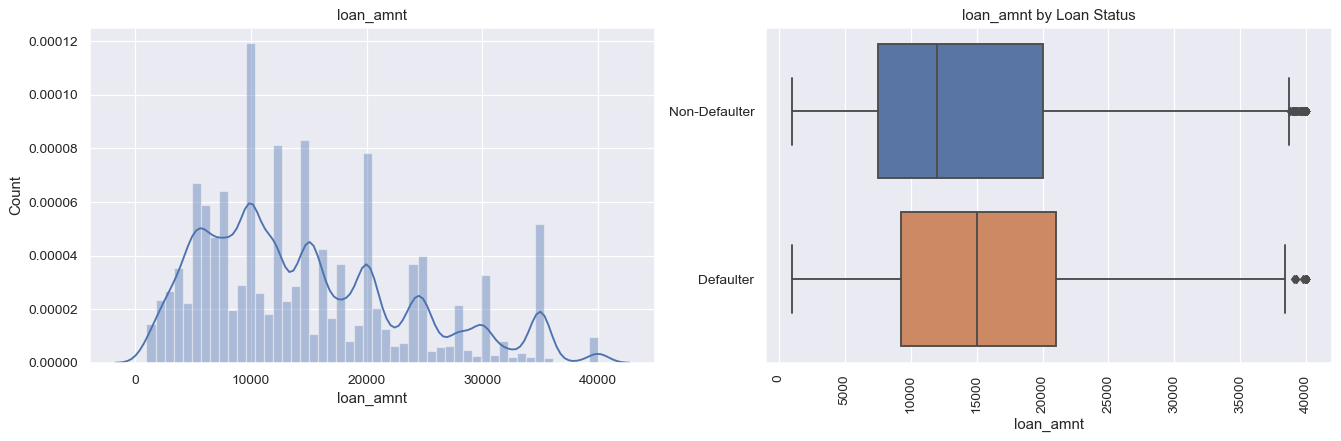

In [28]:
plot_feature('loan_amnt', True)

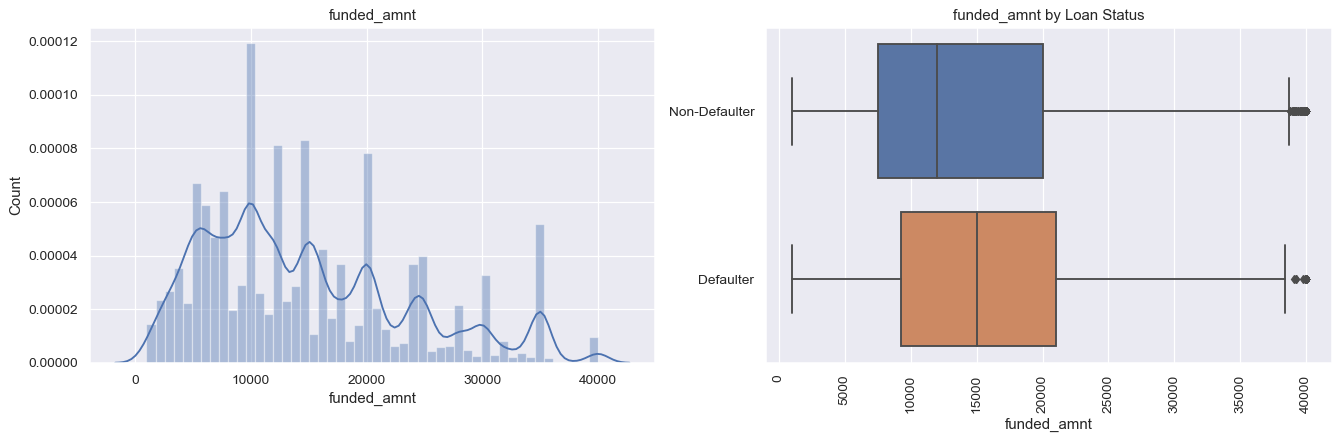

In [29]:
plot_feature('funded_amnt', True)

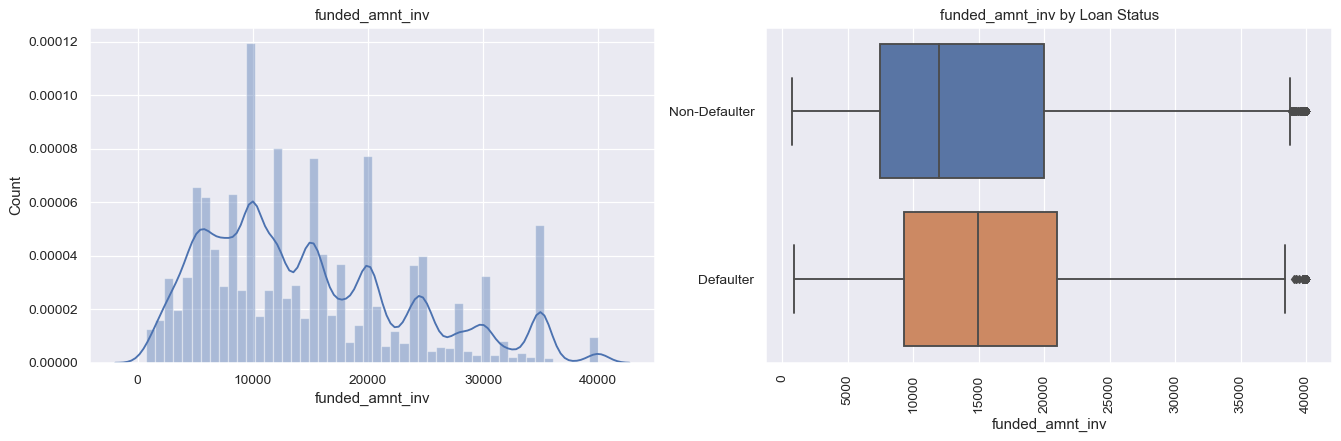

In [30]:
plot_feature('funded_amnt_inv', True)

> All Loan_amnt, funded_amnt, funded_amnt_inv are highly correlated we keep one and remove other features

In [31]:
df.term = df.term.str.replace('months', '').astype(np.int)

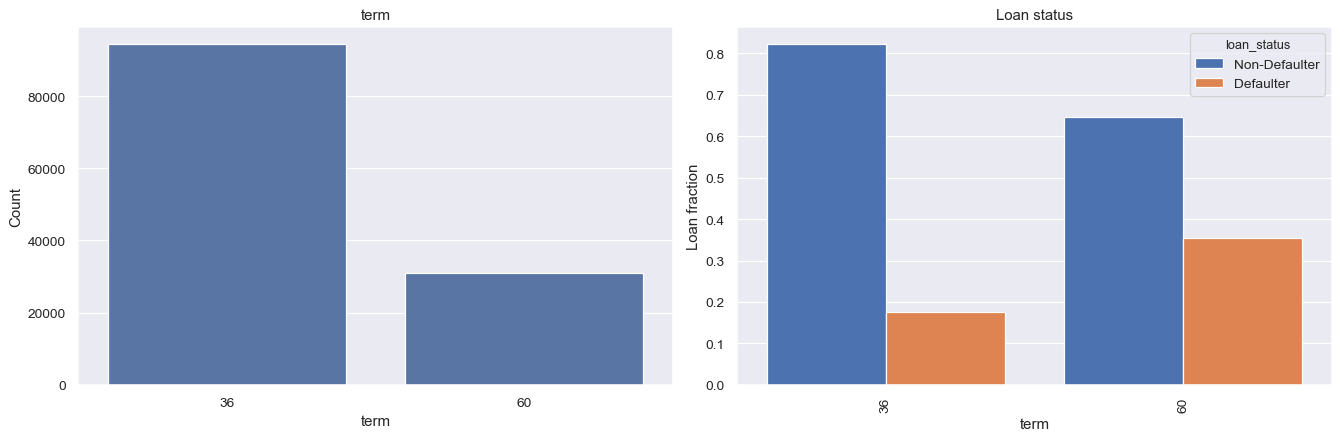

In [32]:
plot_feature('term', False)

> Defaulter is mostly in 36 months period

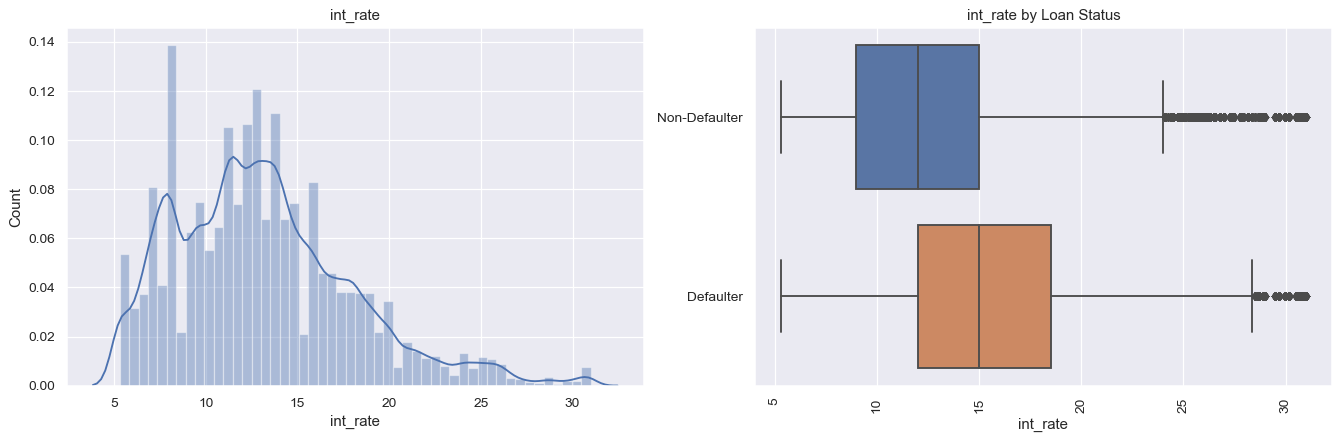

In [33]:
plot_feature('int_rate', True)

> It looks like applicants who could not afford to pay back or were charged off who had higher interest rate.

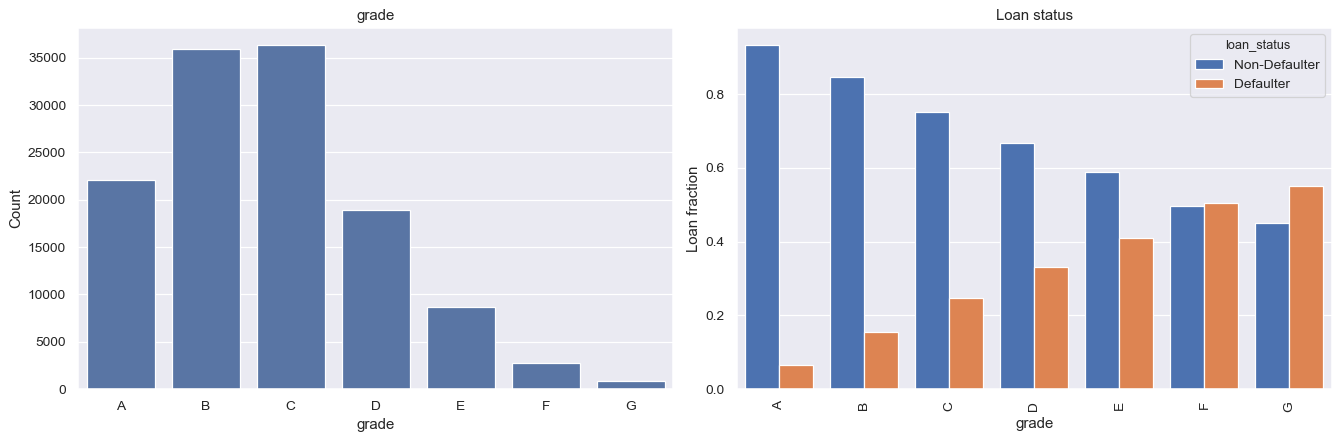

In [34]:
plot_feature('grade',False)

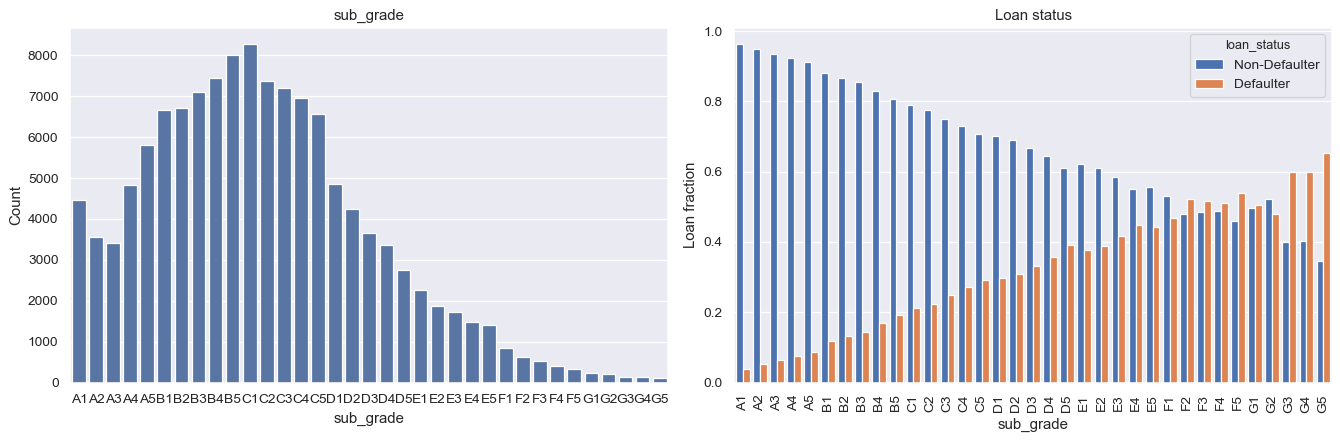

In [35]:
plot_feature('sub_grade',False)

In [36]:
features_to_be_removed.extend(['emp_title', 'id','funded_amnt','funded_amnt_inv','grade','installment'])

In [37]:
df['emp_length'].value_counts()

10+ years    41720
2 years      11175
< 1 year     10279
3 years      10027
1 year        8369
5 years       7682
4 years       7497
8 years       5591
6 years       5465
7 years       5160
9 years       4666
Name: emp_length, dtype: int64

In [38]:
df.emp_length.fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

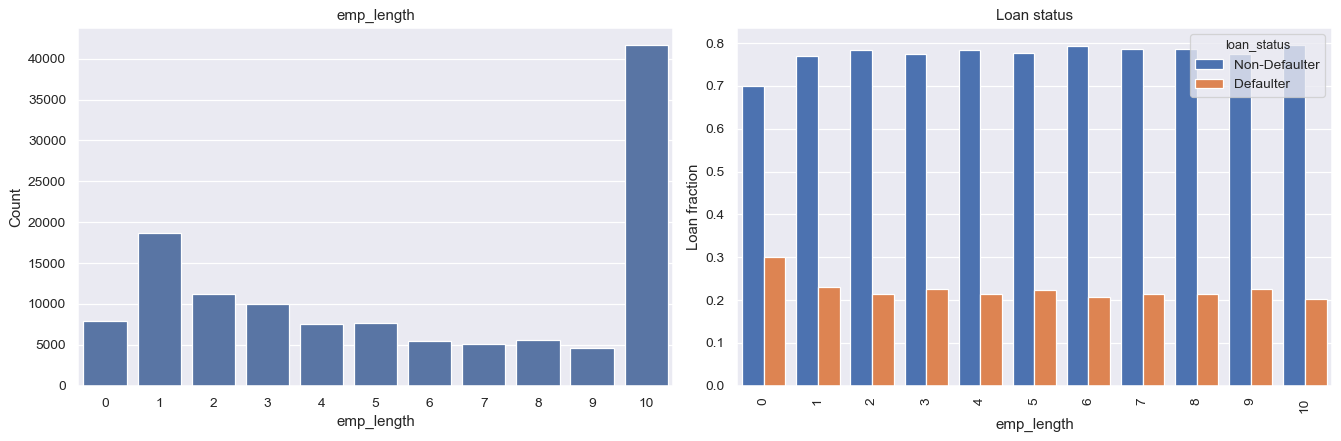

In [39]:
plot_feature('emp_length',False)

>It looks like emp_lengh is not good predictor to determine the loan status. Sicne number of loanees remain same with the employment length.

### Features - 11 to 20

In [40]:
df.iloc[0:5,11:21]

,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code
0,MORTGAGE,100000.0,Not Verified,Apr-14,Non-Defaulter,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,847xx
1,OWN,51000.0,Source Verified,Nov-14,Defaulter,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,142xx
2,RENT,45000.0,Not Verified,Feb-14,Non-Defaulter,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,561xx
3,RENT,38000.0,Verified,Jun-14,Non-Defaulter,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,701xx
4,RENT,55000.0,Not Verified,Mar-14,Non-Defaulter,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,378xx


In [41]:
df.home_ownership.value_counts()

MORTGAGE    61794
RENT        49330
OWN         14378
ANY            36
Name: home_ownership, dtype: int64

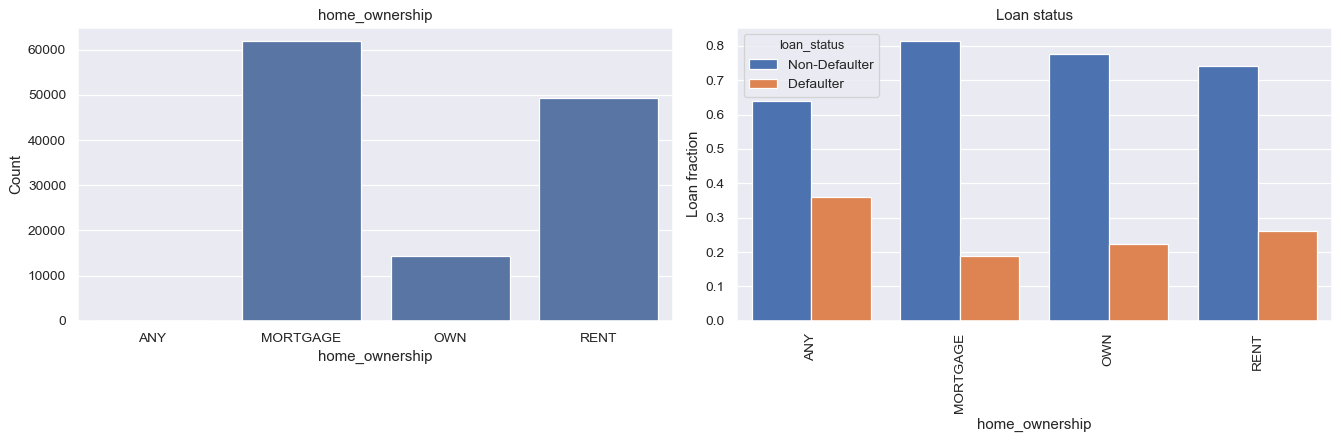

In [42]:
plot_feature('home_ownership', False)

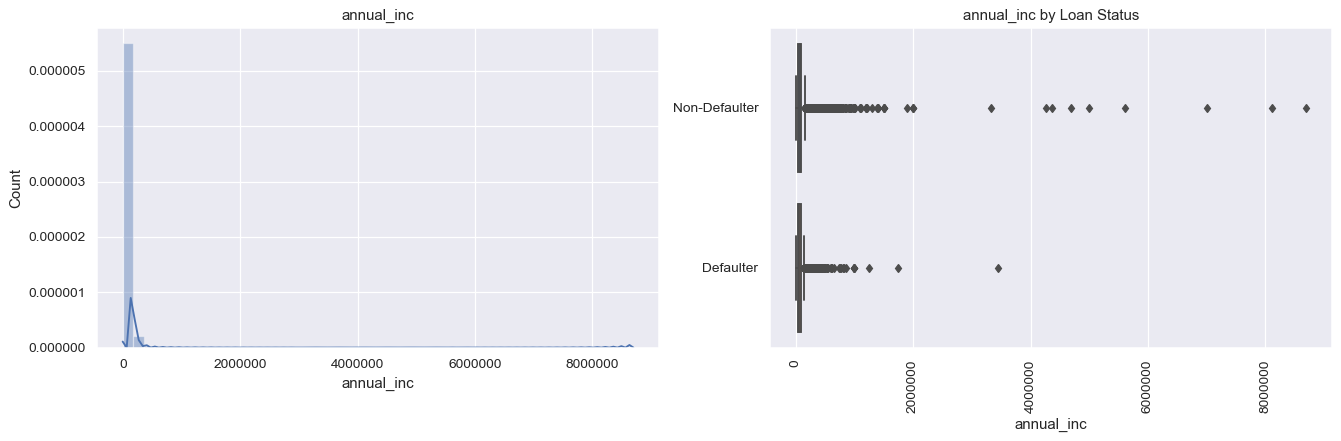

In [43]:
plot_feature('annual_inc',True)

> Its Highly skewed we have to take transform to make it more 

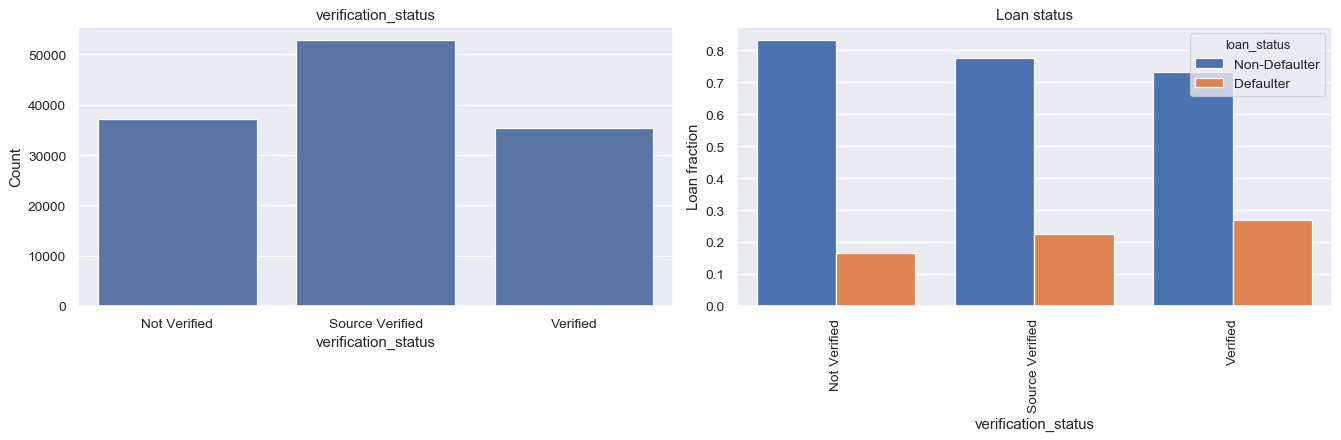

In [44]:
plot_feature('verification_status',False)

In [45]:
df.pymnt_plan.value_counts()

n    125490
y        48
Name: pymnt_plan, dtype: int64

In [46]:
df.purpose.value_counts()

debt_consolidation    72680
credit_card           27811
home_improvement       8379
other                  7510
major_purchase         2684
medical                1503
car                    1236
small_business         1202
vacation                902
moving                  867
house                   690
renewable_energy         73
wedding                   1
Name: purpose, dtype: int64

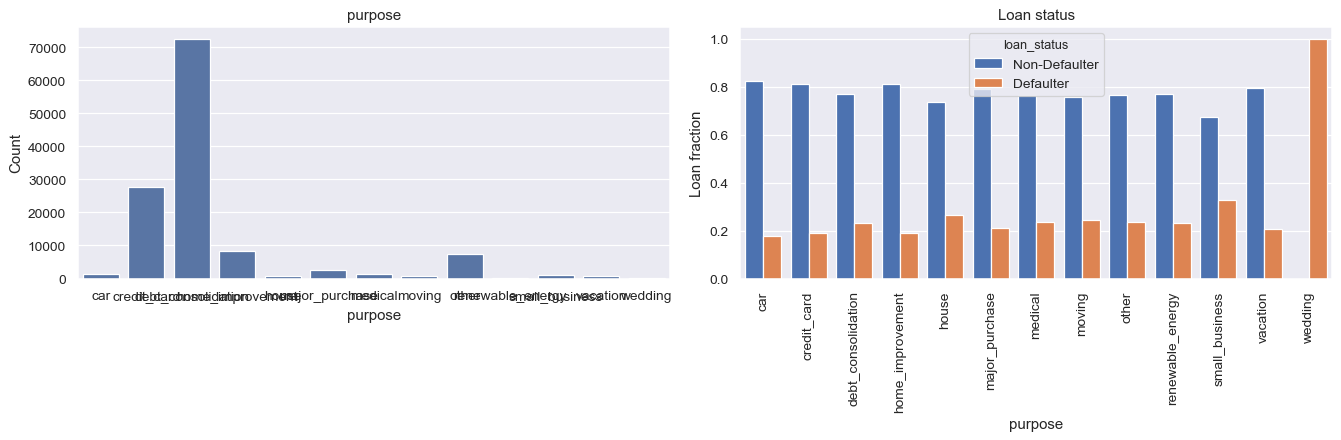

In [47]:
plot_feature('purpose',False)

>* People tend to buy more loans for debt conslidations
* more number of loanees are defaulted more in wedding and small_business

In [48]:
features_to_be_removed.extend(['issue_d','pymnt_plan','url','title','zip_code'])

### Features - 21 to 30 

In [49]:
df.iloc[0:5,21:31]

,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc
0,UT,20.60,1,Feb-97,675,679,2.0,5.0,69.0,27
1,NY,17.68,0,Apr-78,675,679,0.0,NaN,73.0,18
2,MN,16.08,1,Aug-06,660,664,1.0,18.0,NaN,8
3,LA,19.08,0,Oct-97,660,664,0.0,72.0,NaN,6
4,TN,14.86,0,Dec-87,660,664,3.0,31.0,NaN,14


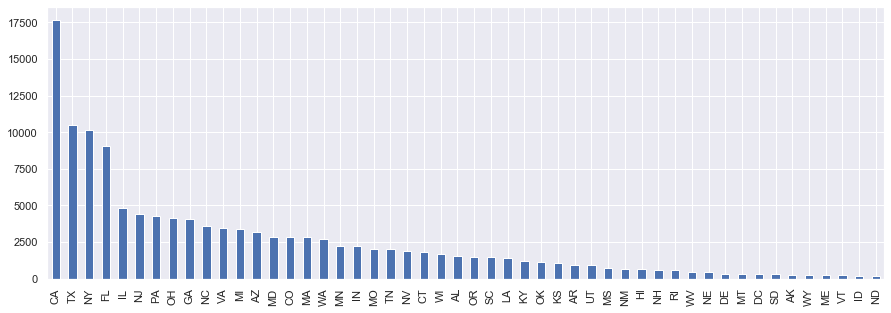

In [50]:
plt.figure(figsize=(15,5))
df.addr_state.value_counts().plot(kind='bar')

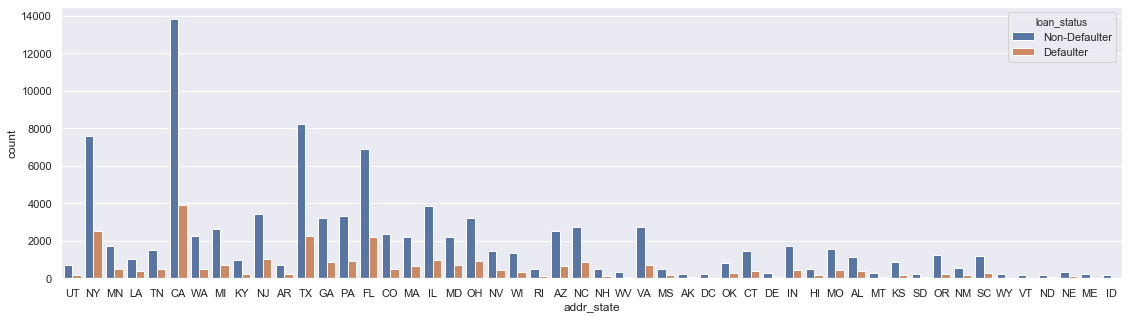

In [51]:
plt.figure(figsize=(19,5))
sns.countplot(df.addr_state,hue=df.loan_status)

> Address state is good discriminatory feature

In [52]:
df['dti'] = df['dti'].fillna(0)

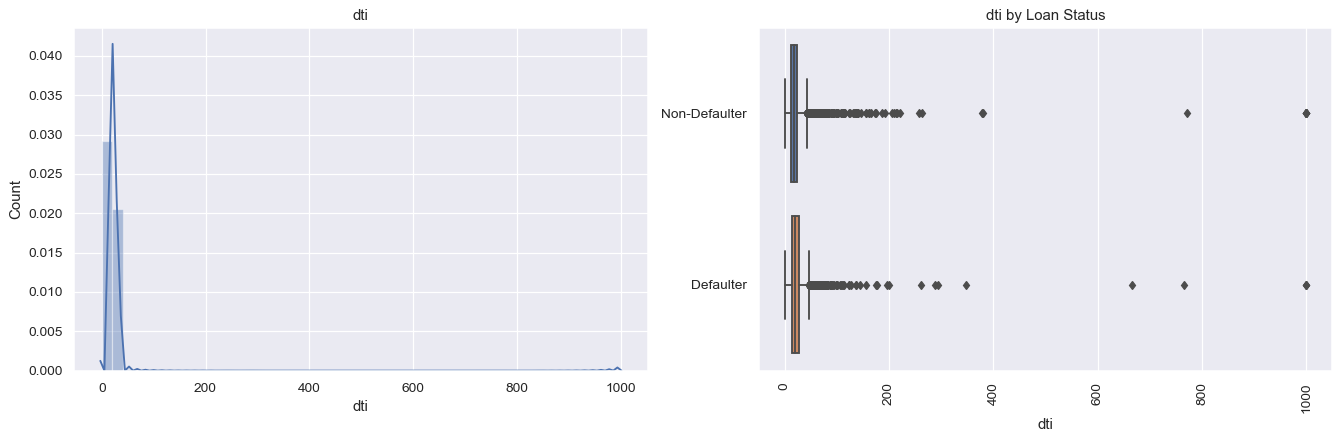

In [53]:
plot_feature('dti',True)

> Like annual_income the dti (debt to income ratio) is also skewed

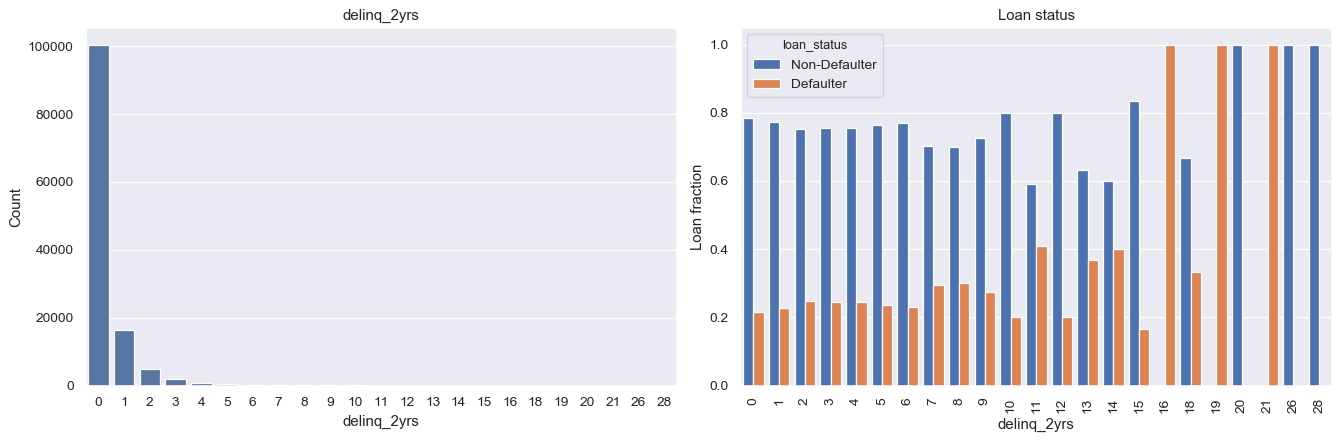

In [54]:
plot_feature('delinq_2yrs',False)

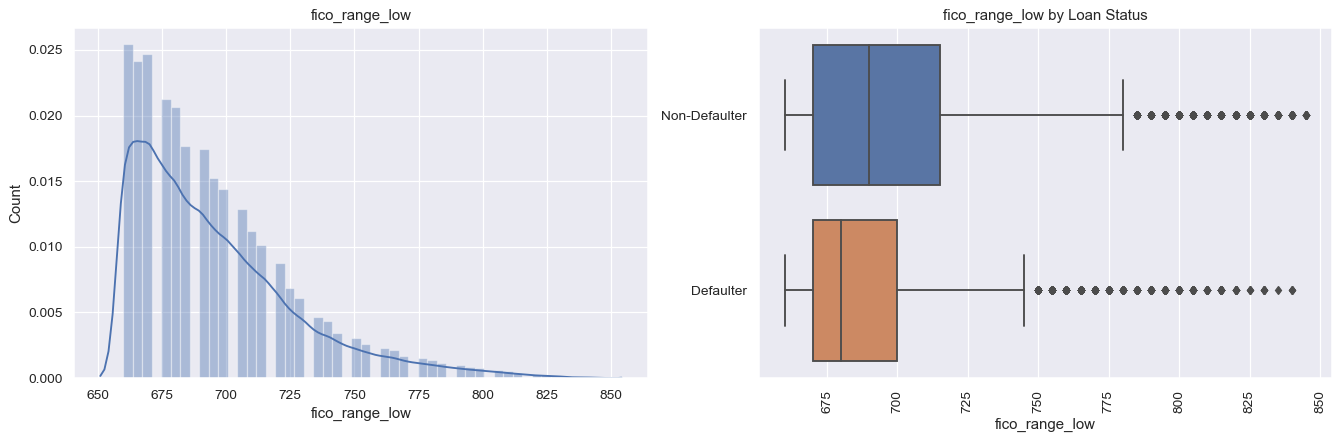

In [55]:
plot_feature('fico_range_low',True)

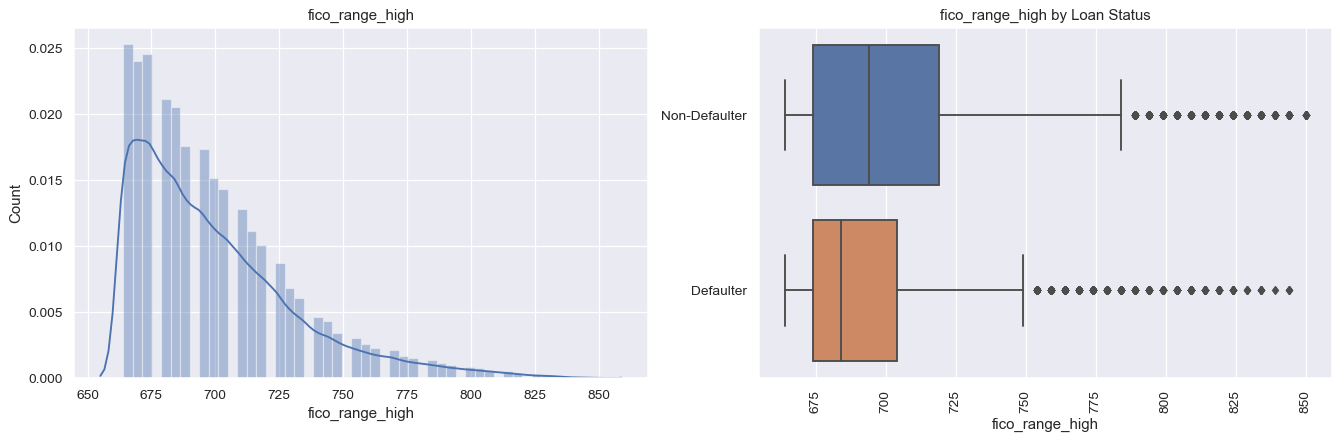

In [56]:
plot_feature('fico_range_high',True)

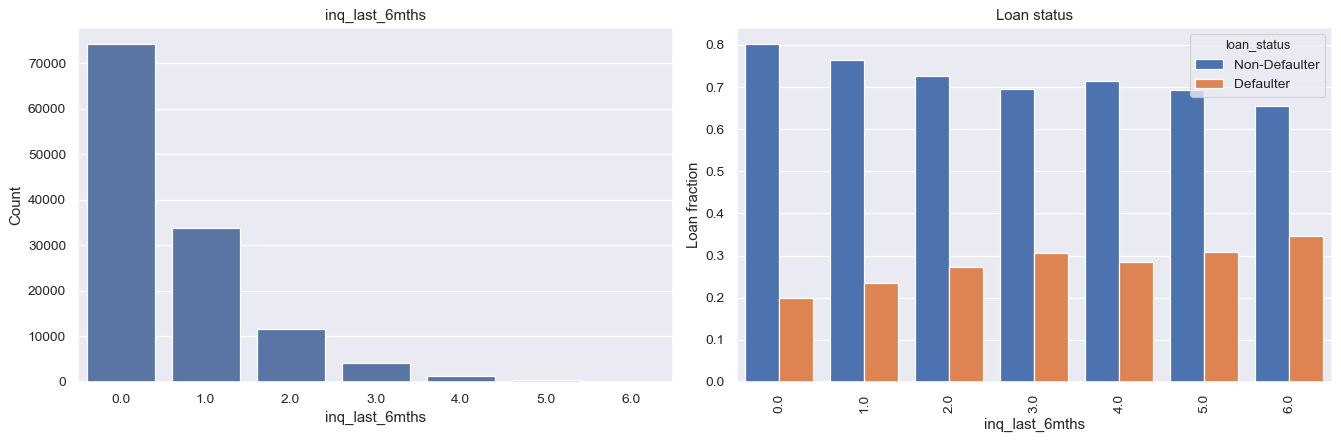

In [57]:
plot_feature('inq_last_6mths',False)

In [58]:
features_to_be_removed.extend(['earliest_cr_line','mths_since_last_delinq','mths_since_last_record','fico_range_low','fico_range_high'])

### features 31 to 40

In [59]:
df.iloc[0:5,31:41]

,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp
0,2,8556,11.60%,41,f,0.0,0.0,11320.480000,11320.48,10000.00
1,1,7650,51%,48,w,0.0,0.0,16311.660000,16311.66,4573.84
2,0,3631,80.70%,12,w,0.0,0.0,4657.369543,4657.37,3600.00
3,0,23290,89.90%,21,f,0.0,0.0,17496.870020,17496.87,13675.00
4,0,9389,55.20%,63,f,0.0,0.0,17784.780260,17784.78,14400.00


In [60]:
df['revol_util']= df['revol_util'].str.rstrip('%').astype('float')

In [61]:
df['revol_util'] = df['revol_util'].fillna(0)

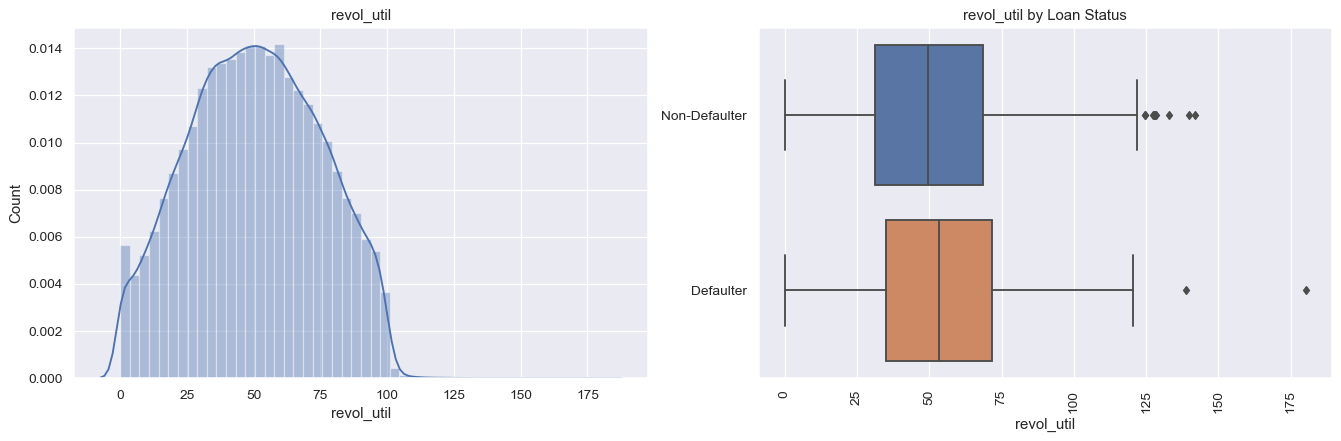

In [62]:
plot_feature('revol_util',True)

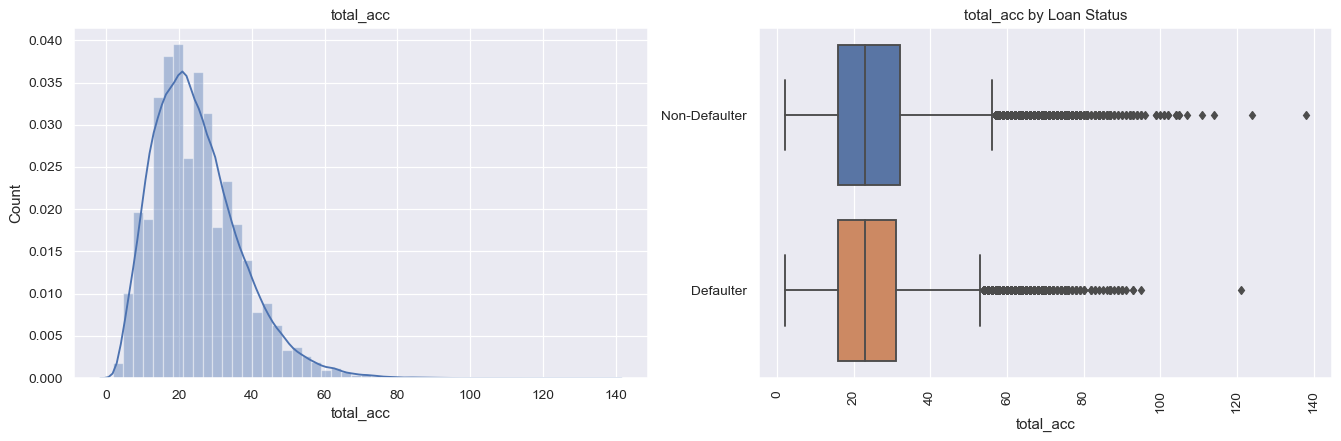

In [63]:
plot_feature('total_acc',True)

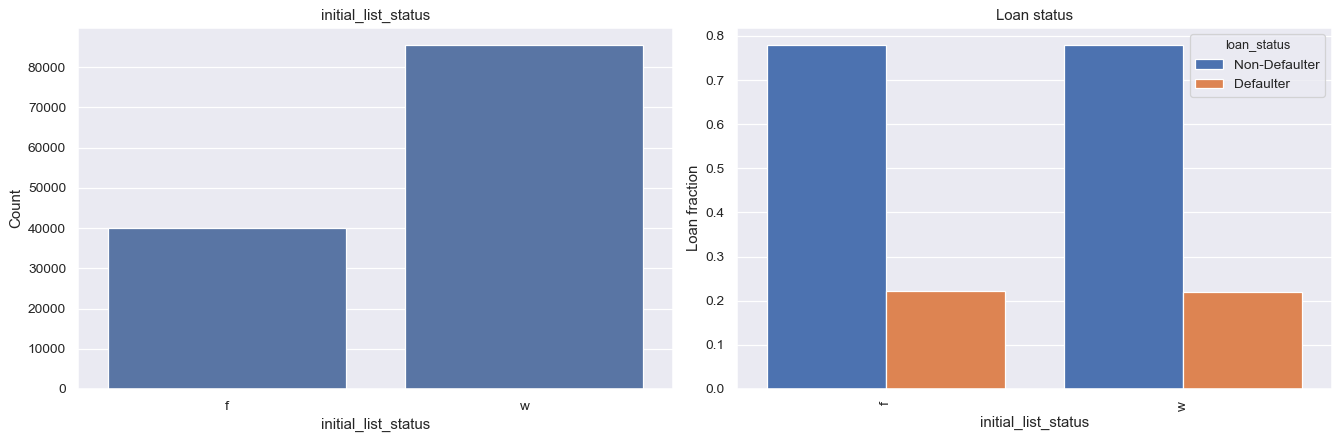

In [64]:
plot_feature('initial_list_status',False)

In [65]:
features_to_be_removed.extend(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp'])

### feature 41 to 50

In [66]:
df.iloc[0:5,41:51]

,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med
0,1320.48,0.0,0.00,0.000,Jun-15,6940.78,Jul-15,764,760,0
1,4381.97,0.0,7355.85,1324.053,Aug-16,444.93,Aug-18,644,640,0
2,1057.37,0.0,0.00,0.000,Feb-17,129.07,Nov-18,629,625,0
3,3821.87,0.0,0.00,0.000,Apr-16,6835.01,Jun-19,714,710,0
4,3384.78,0.0,0.00,0.000,Jan-17,1957.62,Mar-17,664,660,0


In [67]:
df.iloc[0:5,41:51].columns

Index(['total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med'],
      dtype='object')

In [68]:
features_to_be_removed.extend(['total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med'])

### Feature 51 to 60

In [69]:
df.iloc[0:5,51:61]

,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il
0,NaN,Individual,0,0,665575,NaN,NaN,NaN,NaN,NaN
1,NaN,Individual,0,0,21354,NaN,NaN,NaN,NaN,NaN
2,18.0,Individual,0,0,26184,NaN,NaN,NaN,NaN,NaN
3,NaN,Individual,0,0,23290,NaN,NaN,NaN,NaN,NaN
4,NaN,Individual,0,0,12820,NaN,NaN,NaN,NaN,NaN


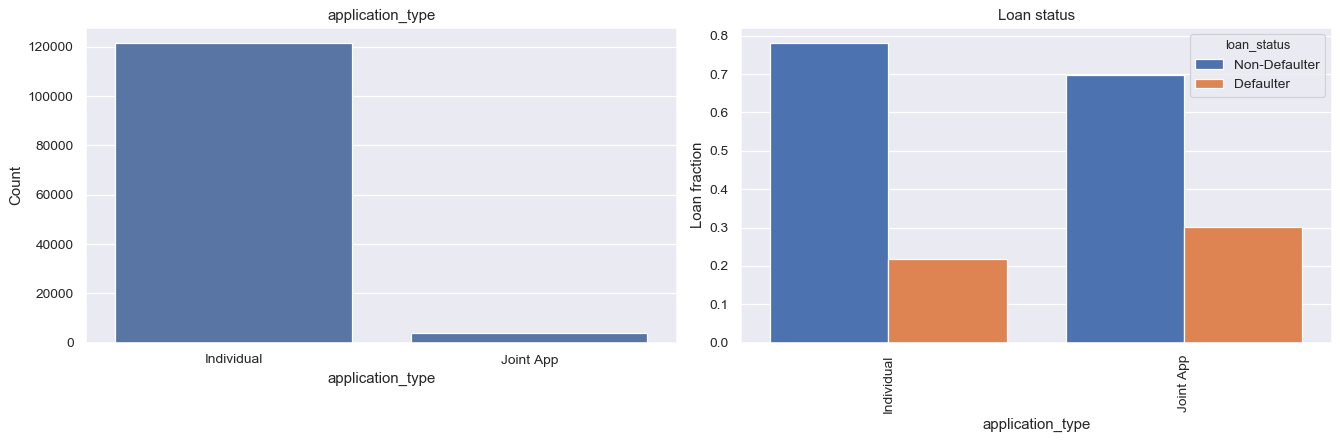

In [70]:
plot_feature('application_type',False)

In [71]:
df['open_acc_6m'] = df['open_acc_6m'].fillna(0)

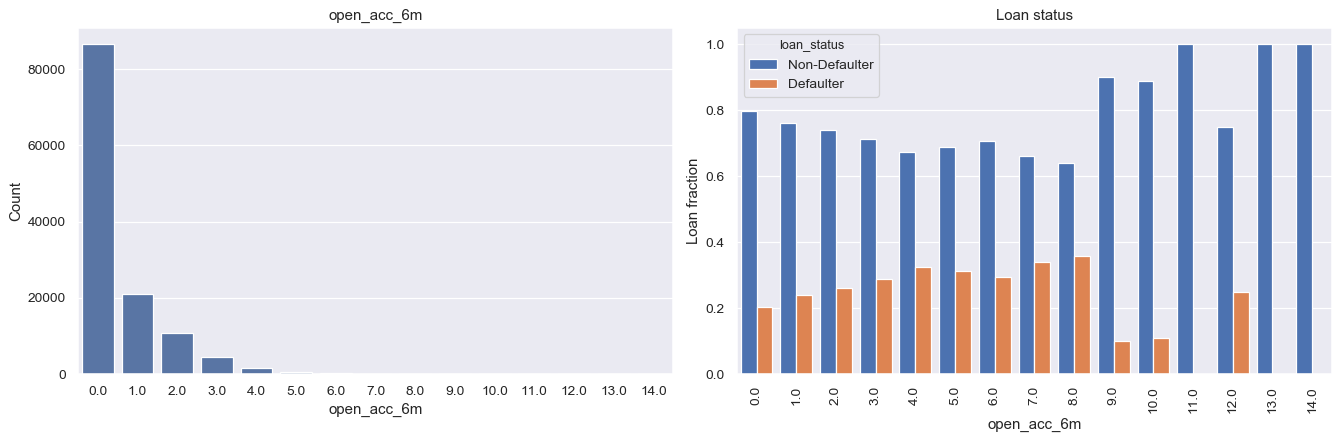

In [72]:
plot_feature('open_acc_6m',False)

In [73]:
df['open_act_il'] = df['open_act_il'].fillna(0)

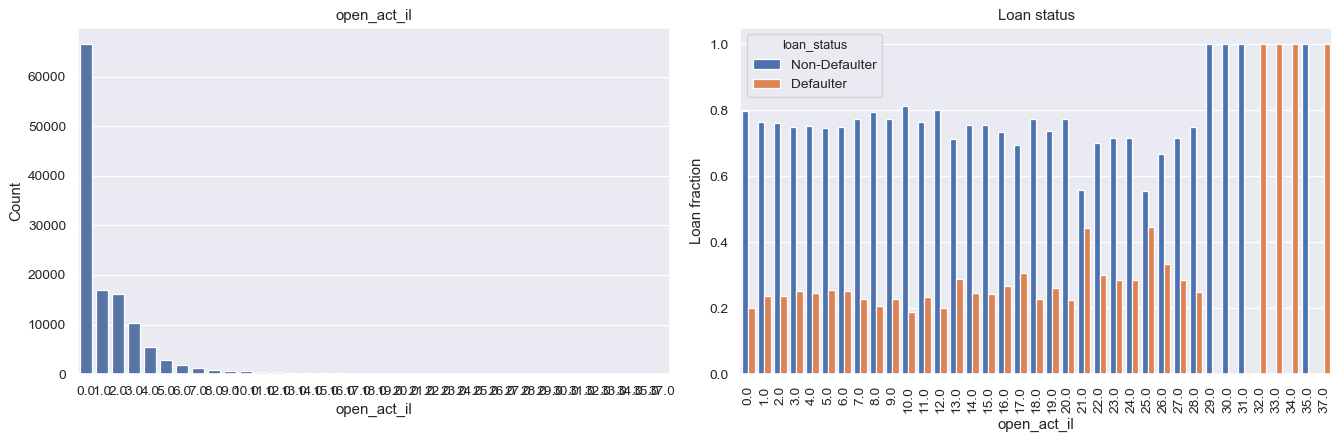

In [74]:
plot_feature('open_act_il',False)

In [75]:
df['open_il_12m'] = df['open_il_12m'].fillna(0)

In [76]:
df['open_il_24m'] = df['open_il_24m'].fillna(0)

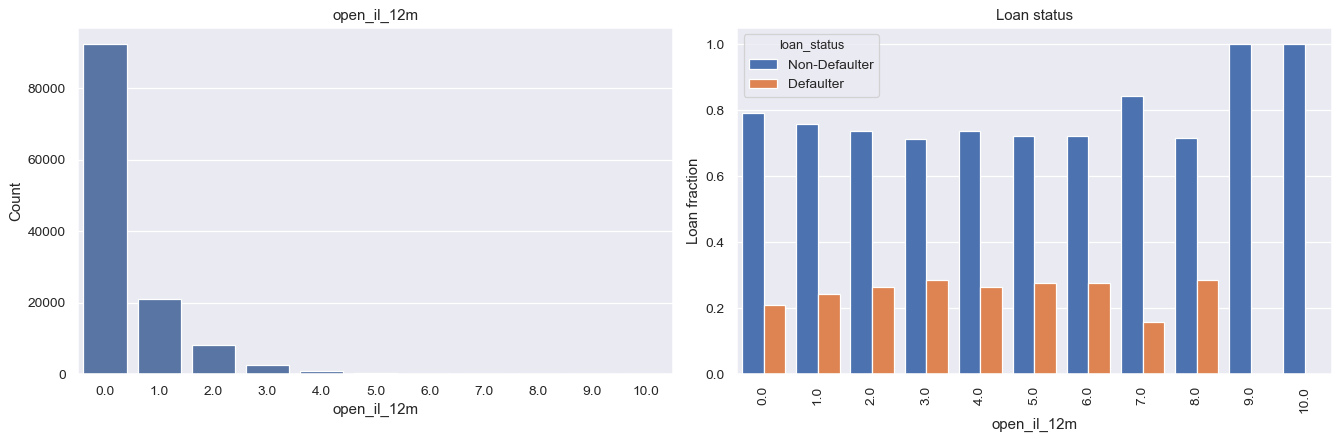

In [77]:
plot_feature('open_il_12m',False)

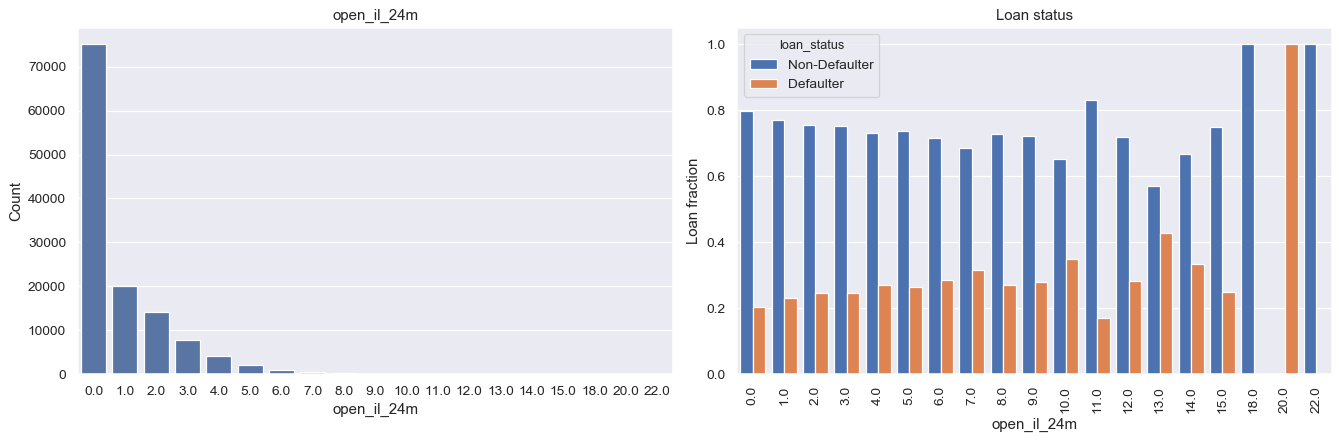

In [78]:
plot_feature('open_il_24m',False)

In [79]:
features_to_be_removed.extend(['mths_since_last_major_derog','acc_now_delinq','tot_coll_amt','mths_since_rcnt_il'])

### Features 61 to 70

In [80]:
df.iloc[0:5,61:71]

,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,NaN,NaN,NaN,NaN,NaN,76300,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,15000,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,4500,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,25900,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,17000,NaN,NaN,NaN


In [81]:
df['total_bal_il'] = df['total_bal_il'].fillna(0)

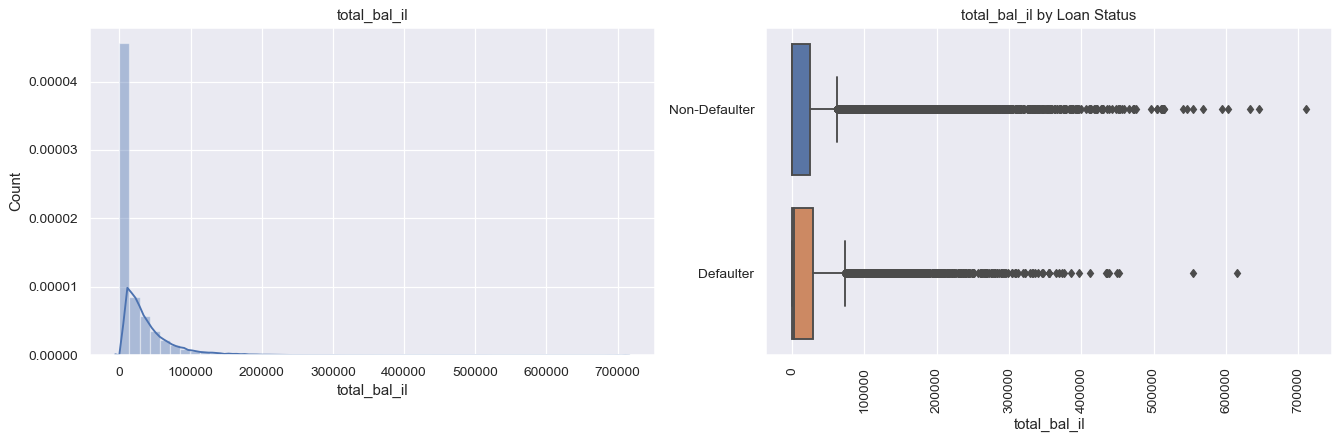

In [82]:
plot_feature('total_bal_il',True)

In [83]:
df['open_rv_24m'] = df['open_rv_24m'].fillna(0)

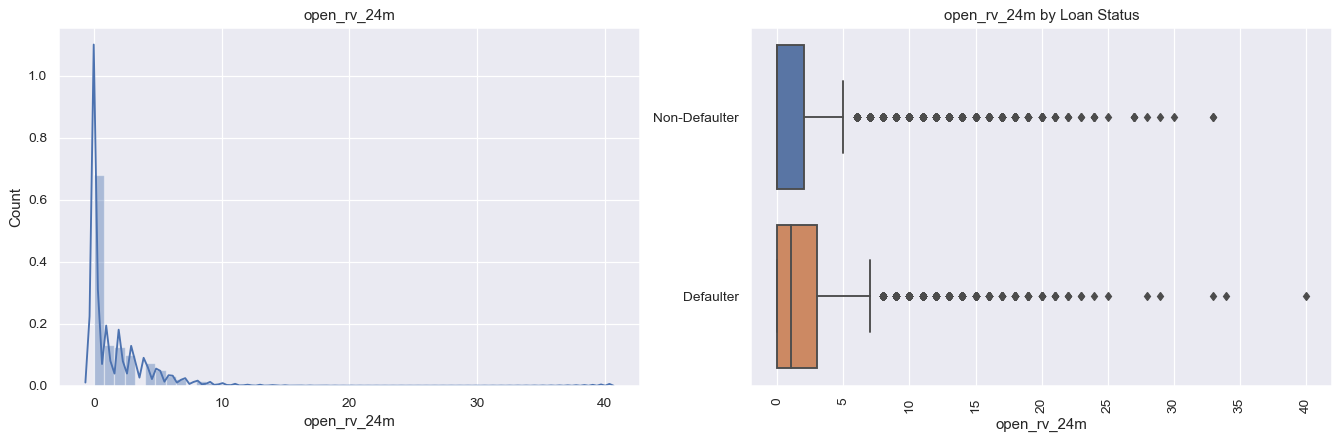

In [84]:
plot_feature('open_rv_24m',True)

In [85]:
df['max_bal_bc'] = df['max_bal_bc'].fillna(0)

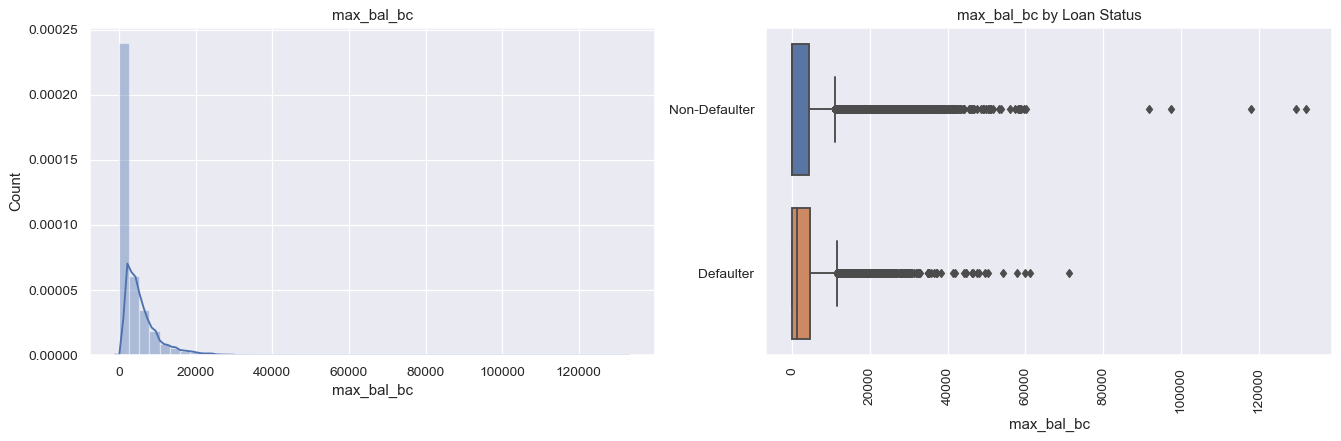

In [86]:
plot_feature('max_bal_bc',True)

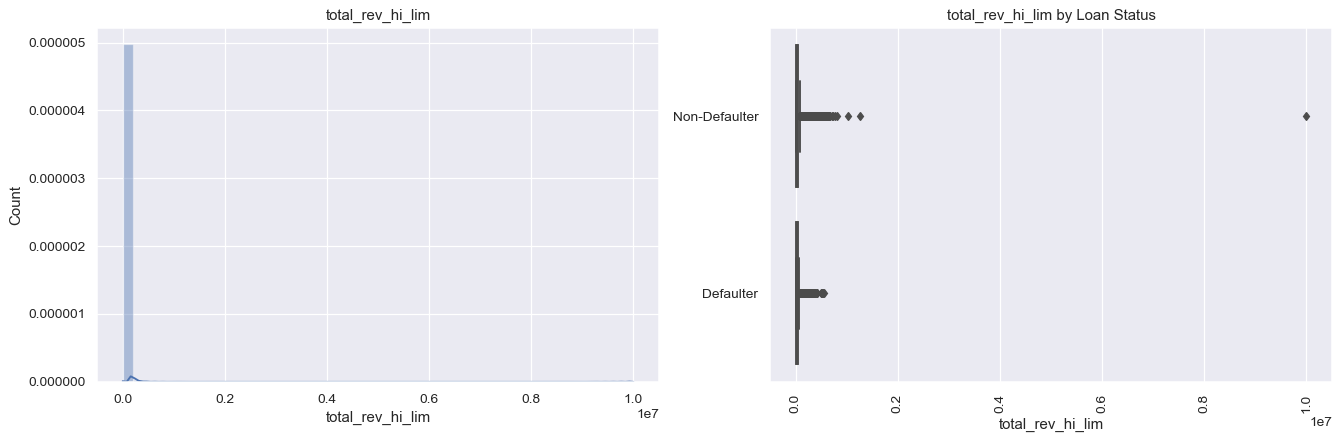

In [87]:
plot_feature('total_rev_hi_lim',True)

In [88]:
df['inq_fi'] = df['inq_fi'].fillna(0)

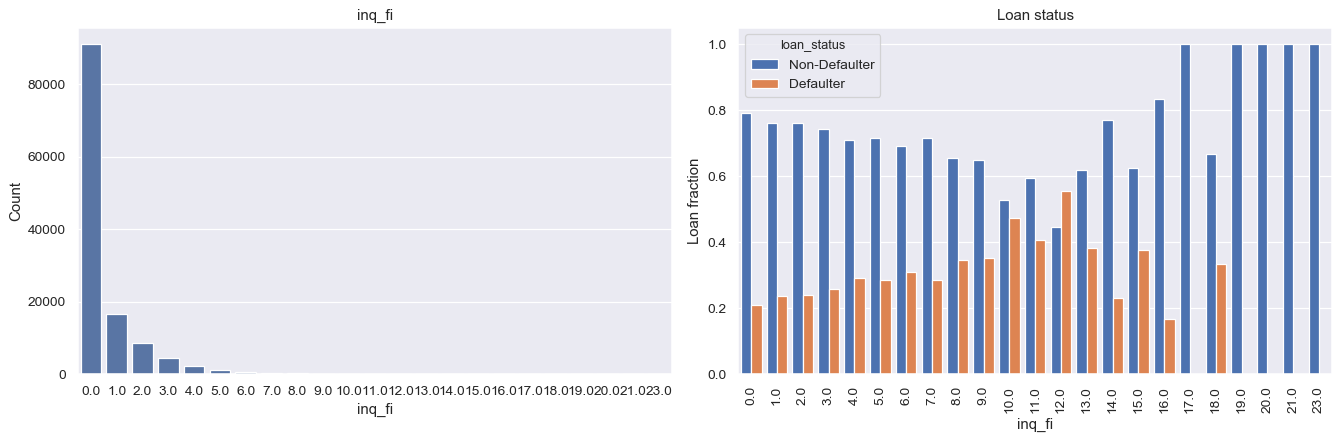

In [89]:
plot_feature('inq_fi',False)

In [90]:
df['total_cu_tl'] = df['total_cu_tl'].fillna(0)

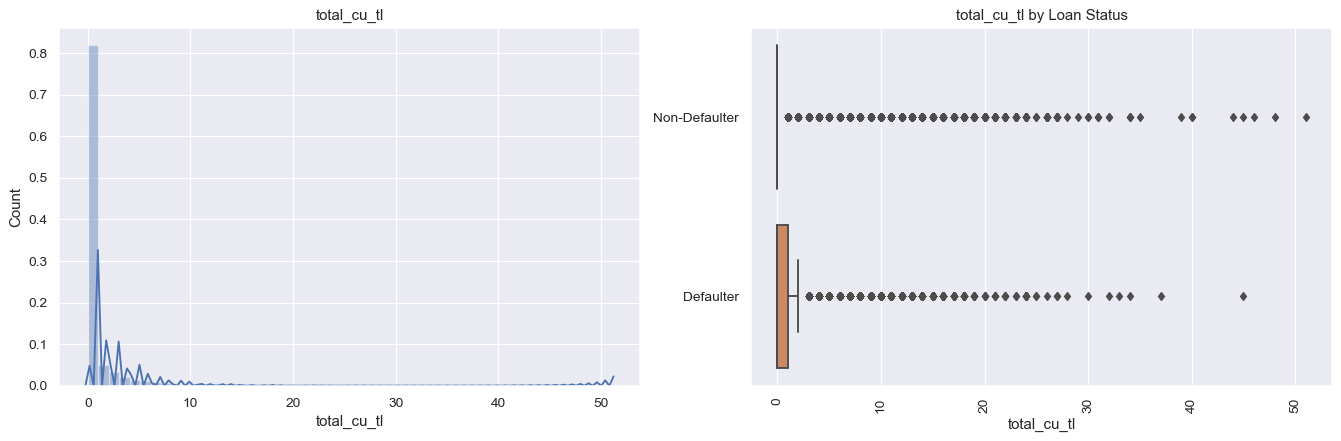

In [91]:
plot_feature('total_cu_tl',True)

In [92]:
df['inq_last_12m'] =df['inq_last_12m'].fillna(0)

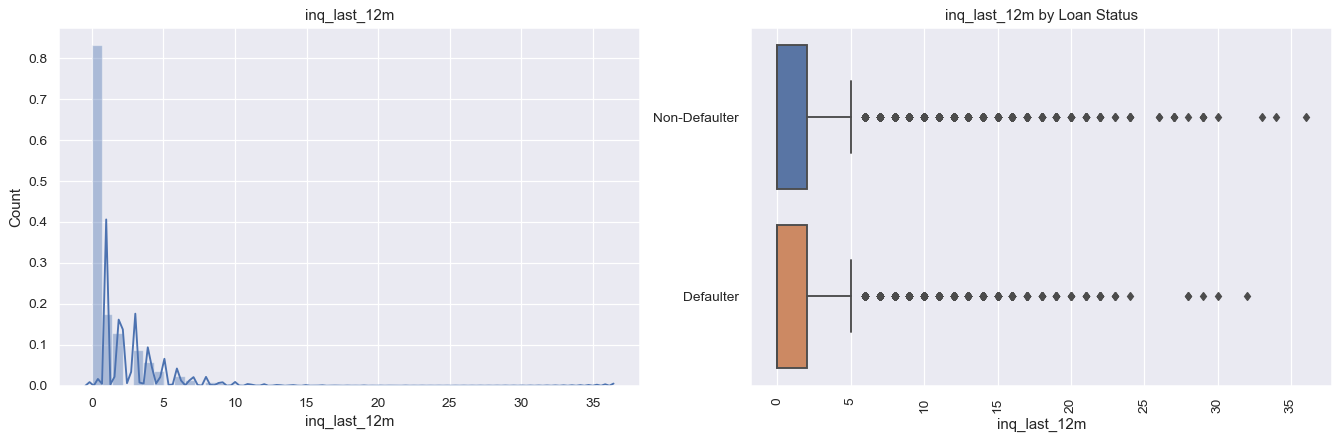

In [93]:
plot_feature('inq_last_12m',True)

In [94]:
features_to_be_removed.extend(['il_util','open_rv_12m','open_rv_24m','all_util'])

### features 71 to 80

In [95]:
df.iloc[0:5,71:81]

,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl
0,5,24651.0,20259.0,15.3,0,0,206.0,198,13,8
1,7,1525.0,2462.0,75.6,0,0,131.0,439,4,4
2,7,3273.0,869.0,80.7,0,0,90.0,67,12,6
3,1,3882.0,665.0,95.6,0,0,54.0,199,13,13
4,8,916.0,4294.0,56.2,0,0,125.0,315,9,5


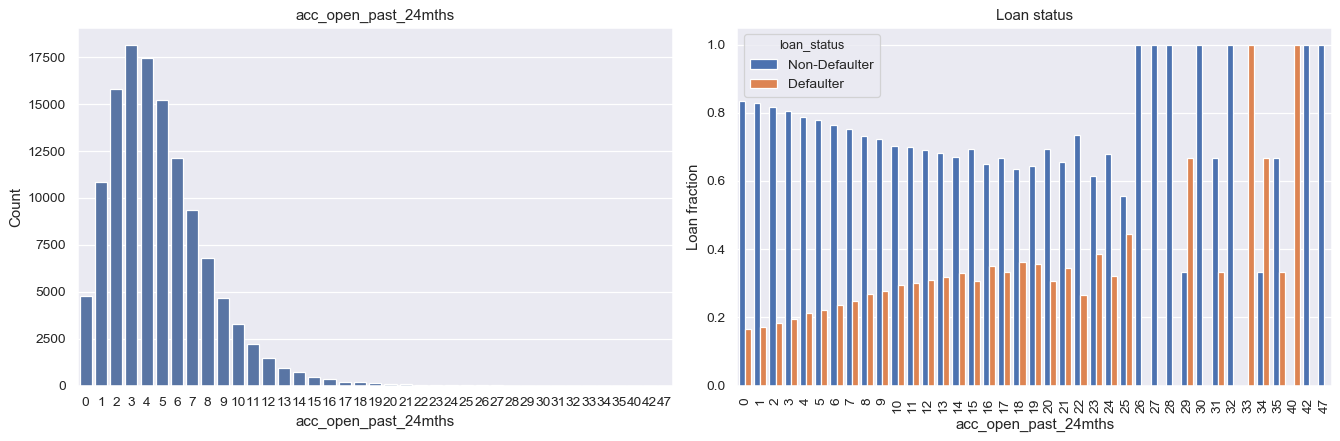

In [96]:
plot_feature('acc_open_past_24mths',False)

In [97]:
df['avg_cur_bal'] = df['avg_cur_bal'].fillna(0)

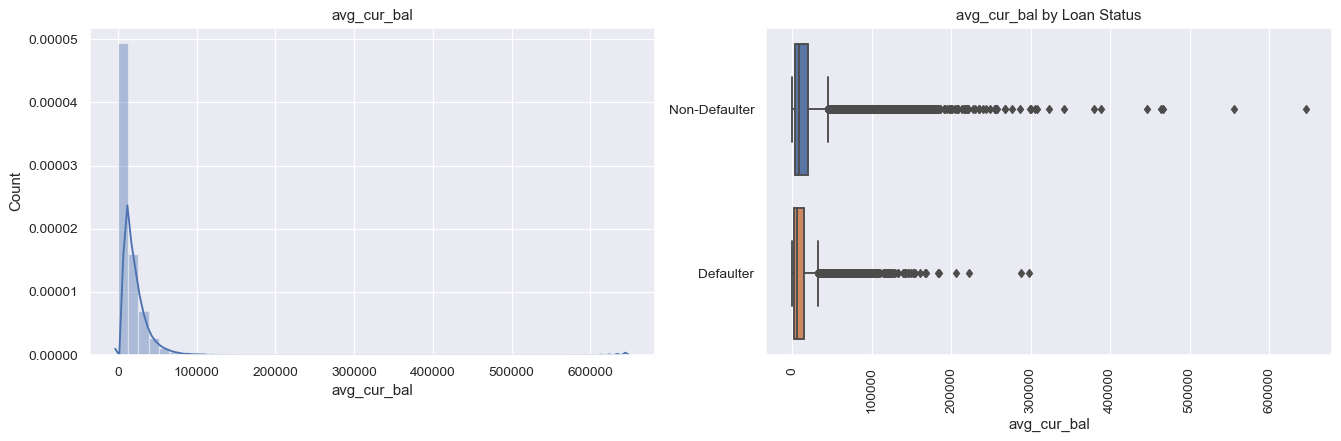

In [98]:
plot_feature('avg_cur_bal',True)

In [99]:
df['bc_open_to_buy'] = df['bc_open_to_buy'].fillna(0)

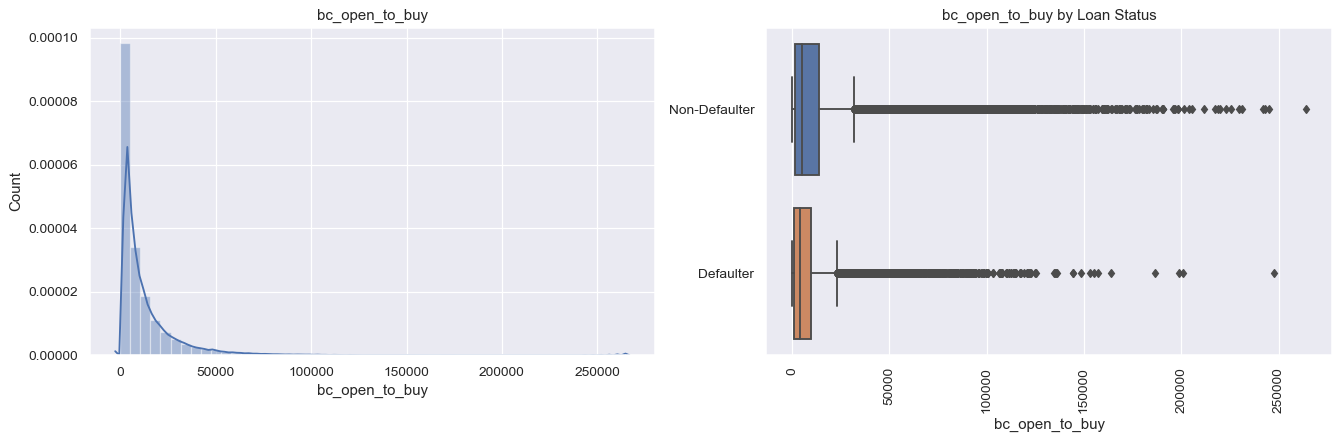

In [100]:
plot_feature('bc_open_to_buy',True)

In [101]:
df['bc_util'] = df['bc_util'].fillna(0)

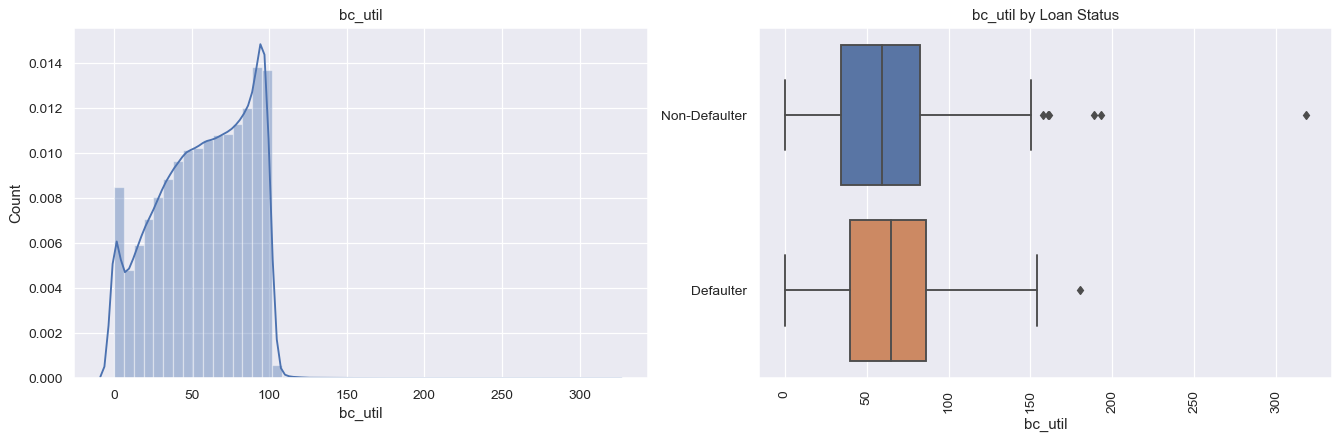

In [102]:
plot_feature('bc_util',True)

In [103]:
df['mo_sin_old_il_acct']= df['mo_sin_old_il_acct'].fillna(129)   #mediann value

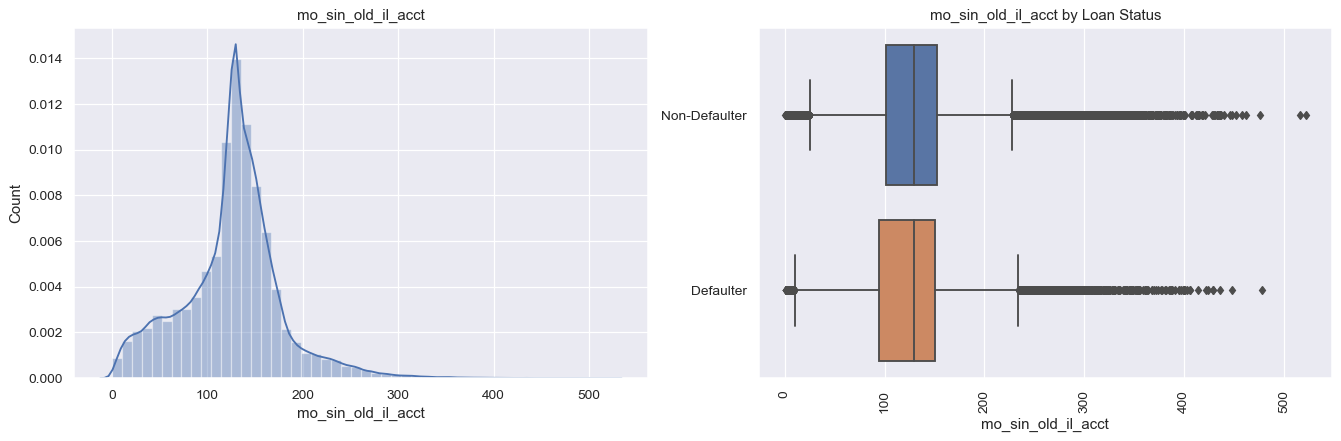

In [104]:
plot_feature('mo_sin_old_il_acct',True)

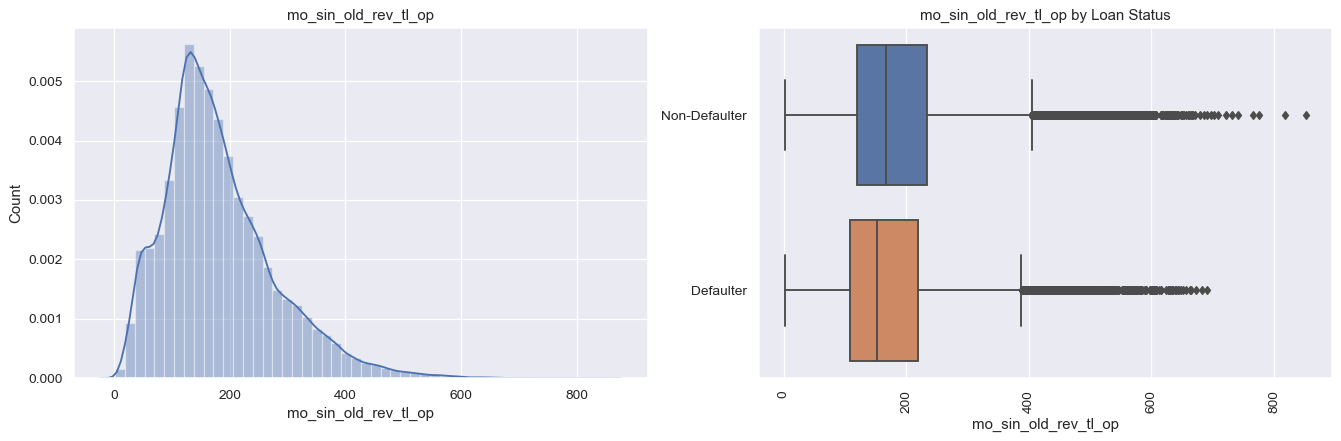

In [105]:
plot_feature('mo_sin_old_rev_tl_op',True)

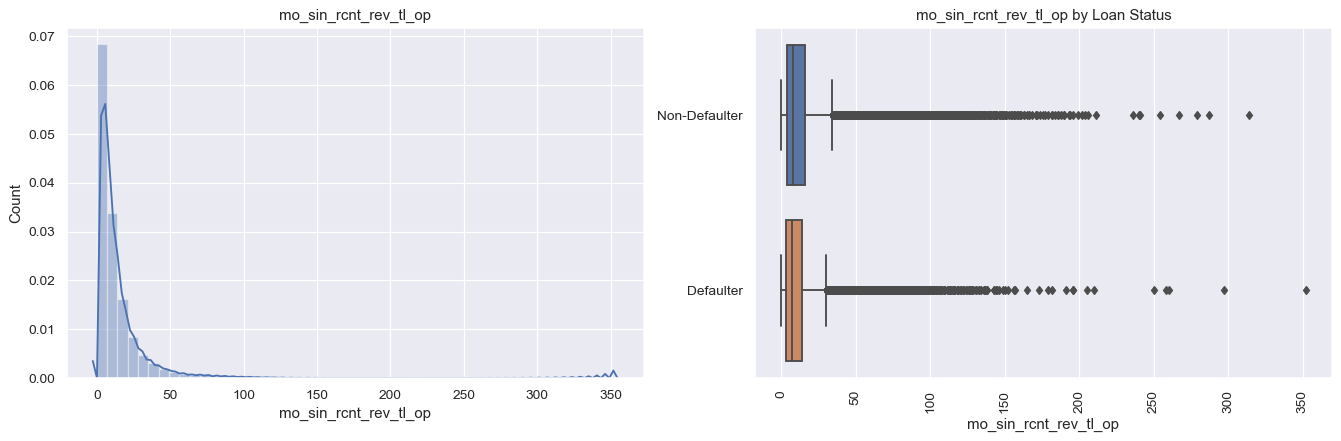

In [106]:
plot_feature('mo_sin_rcnt_rev_tl_op',True)

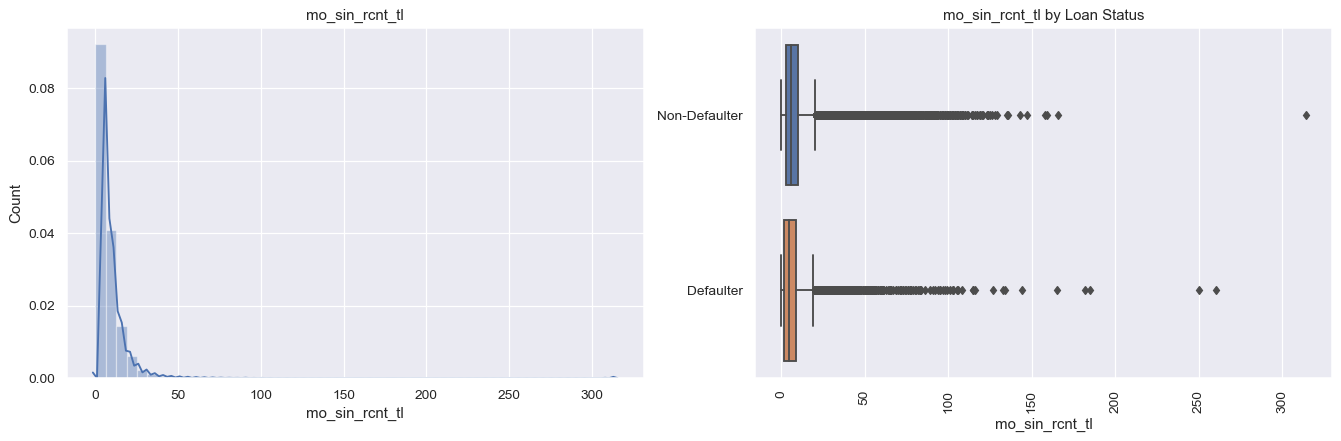

In [107]:
plot_feature('mo_sin_rcnt_tl',True)

In [108]:
features_to_be_removed.extend(['chargeoff_within_12_mths','delinq_amnt'])

### Features 81 to 90

In [109]:
df.iloc[0:5,81:91]

,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl
0,2,13.0,NaN,2.0,5.0,0,2,3,7,7
1,0,4.0,NaN,4.0,NaN,0,6,7,8,19
2,0,12.0,60.0,3.0,60.0,2,4,4,3,5
3,0,13.0,72.0,17.0,72.0,0,4,6,4,12
4,6,9.0,31.0,0.0,31.0,0,6,11,7,16


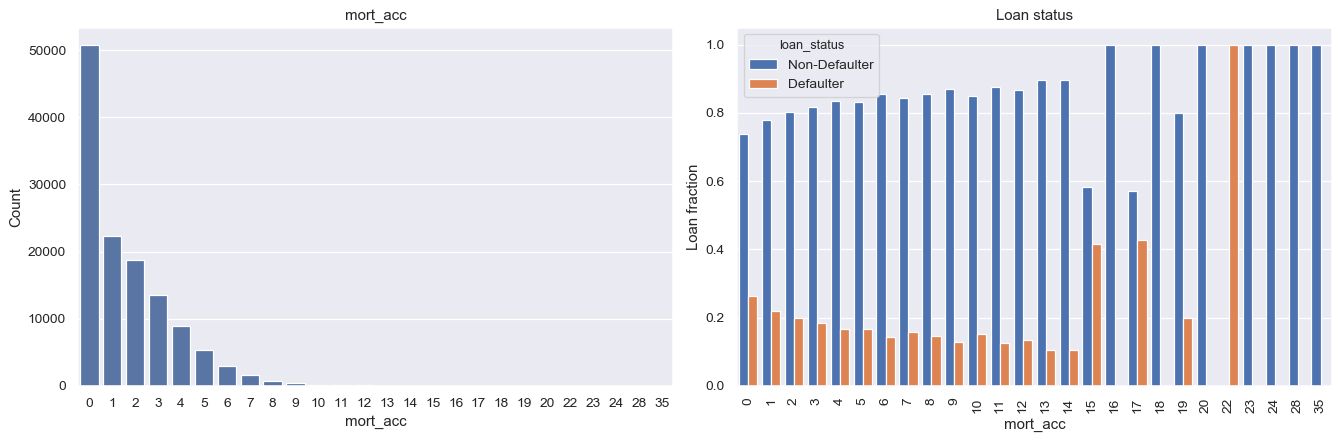

In [110]:
plot_feature('mort_acc',False)

In [111]:
df['mths_since_recent_bc'] = df['mths_since_recent_bc'].fillna(0)

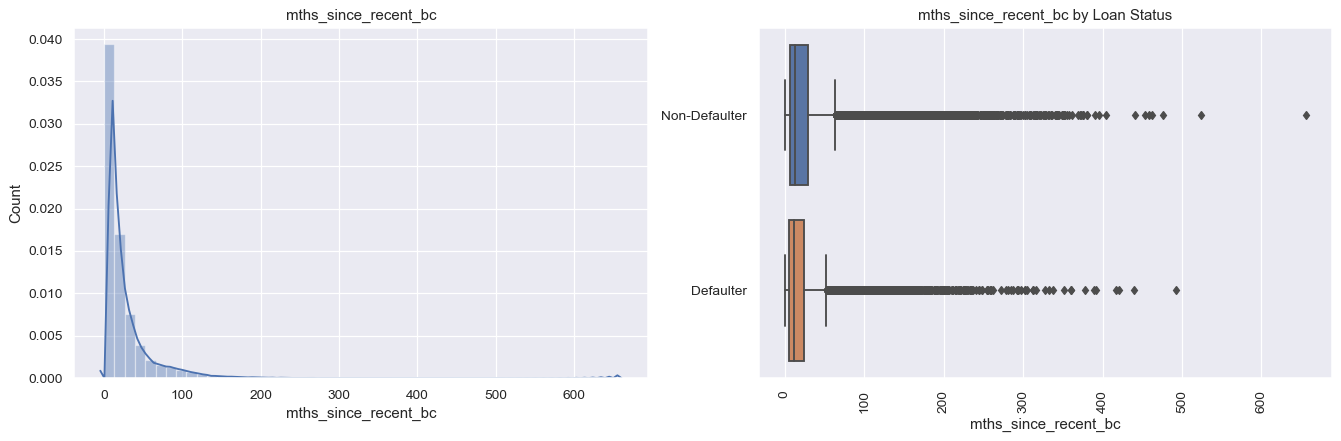

In [112]:
plot_feature('mths_since_recent_bc',True)

In [113]:
df['mths_since_recent_inq'] = df['mths_since_recent_inq'].fillna(0) 

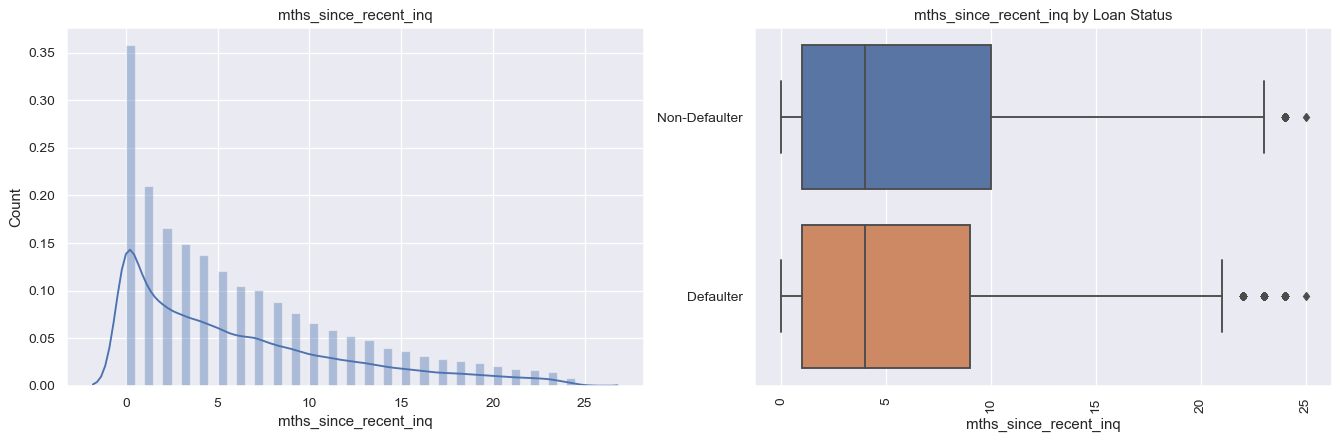

In [114]:
plot_feature('mths_since_recent_inq',True)

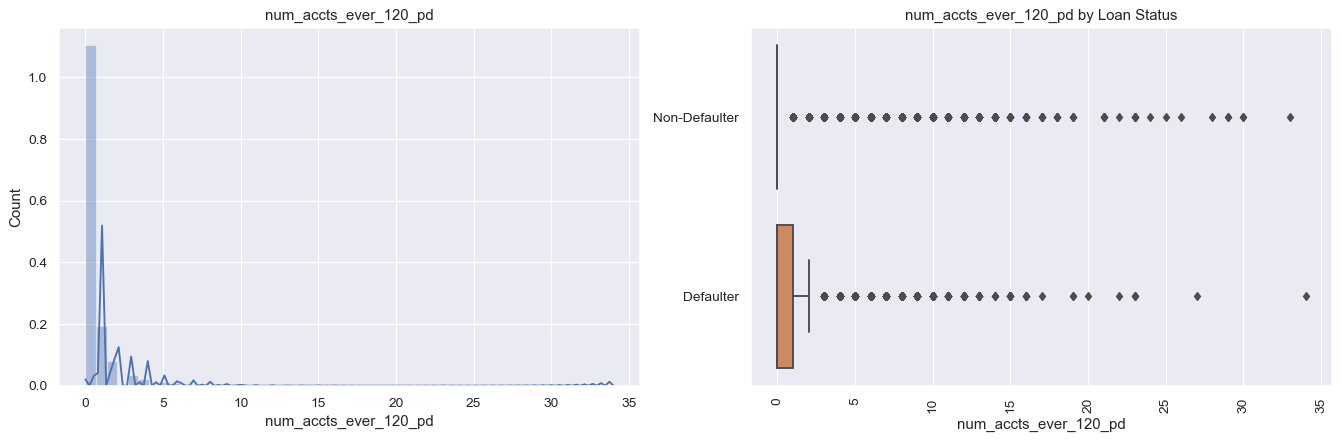

In [115]:
plot_feature('num_accts_ever_120_pd',True)

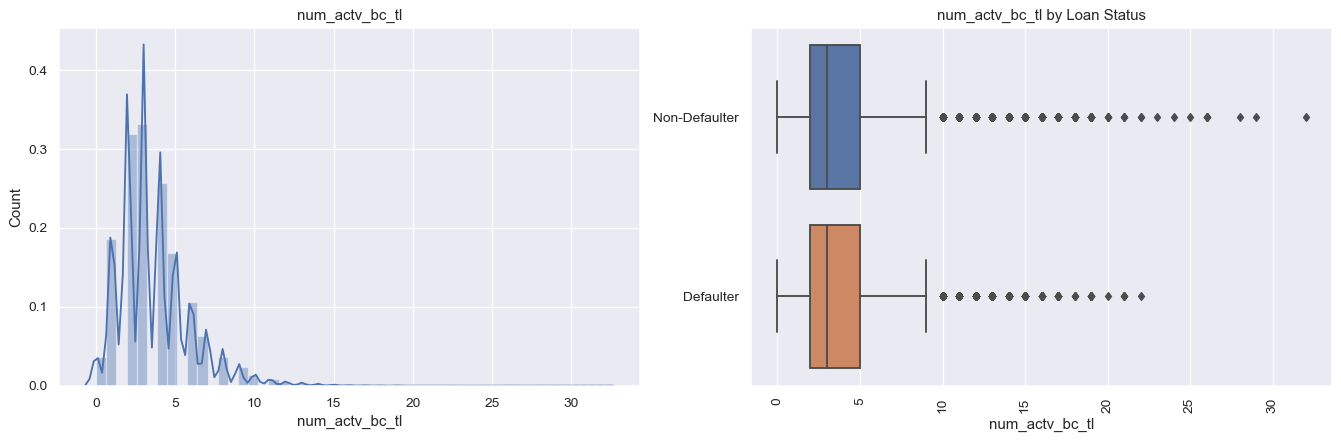

In [116]:
plot_feature('num_actv_bc_tl',True)

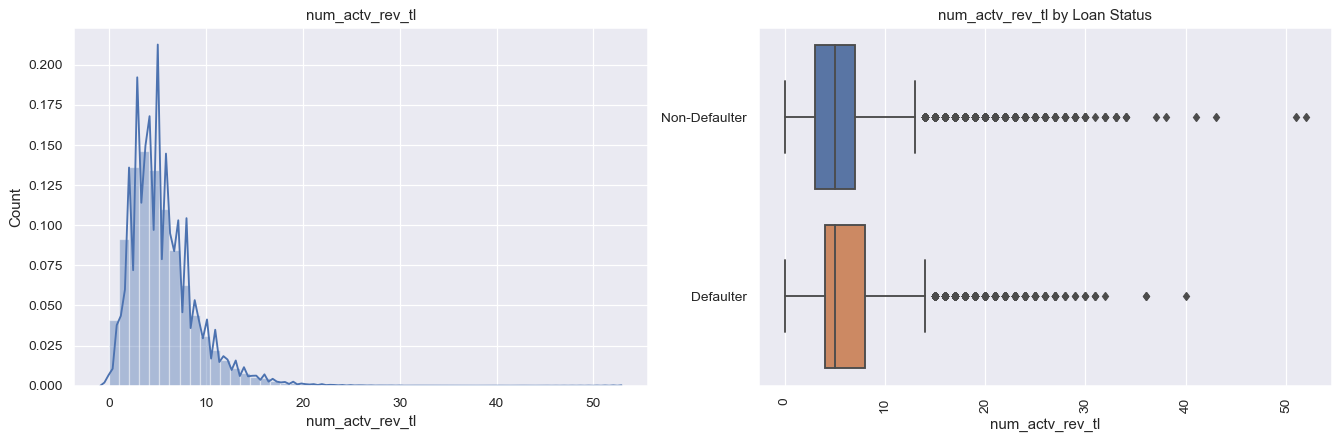

In [117]:
plot_feature('num_actv_rev_tl',True)

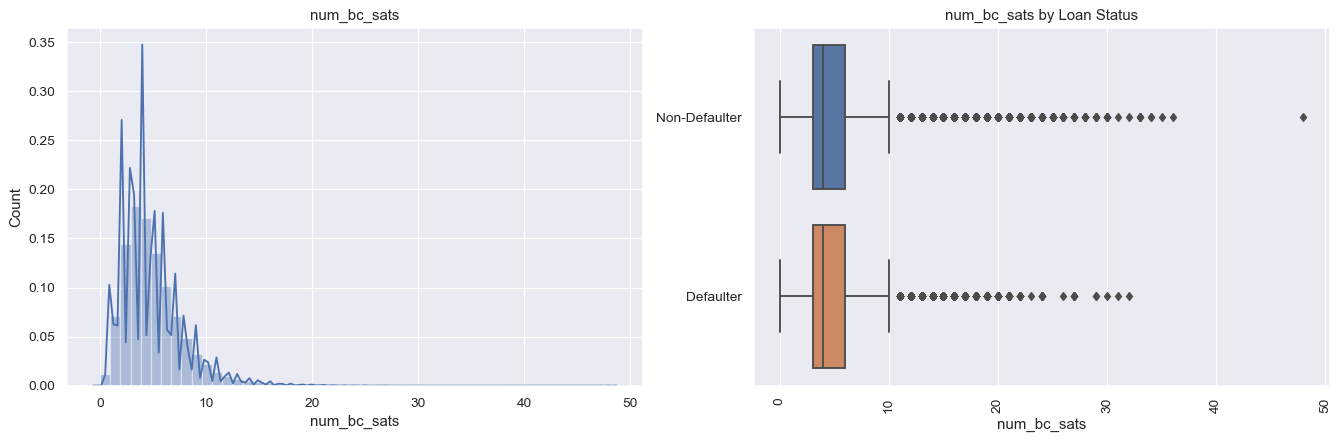

In [118]:
plot_feature('num_bc_sats',True)

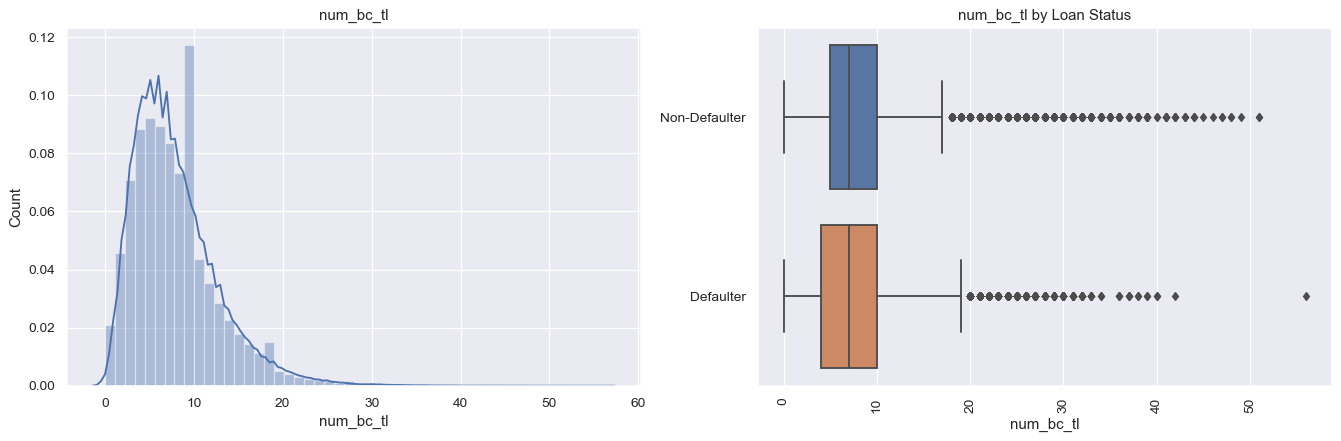

In [119]:
plot_feature('num_bc_tl',True)

In [120]:
features_to_be_removed.extend(['mths_since_recent_bc_dlq','mths_since_recent_revol_delinq'])

### Features 91 to 100

In [121]:
df.iloc[0:5,91:101]

,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq
0,28,10,11.0,3,26,0.0,0,0,1,97.5
1,15,17,33.0,7,18,0.0,0,0,3,100.0
2,7,4,5.0,4,7,0.0,0,1,2,90.9
3,1,6,20.0,6,6,0.0,0,0,0,95.2
4,30,12,26.0,11,14,0.0,0,0,4,93.7


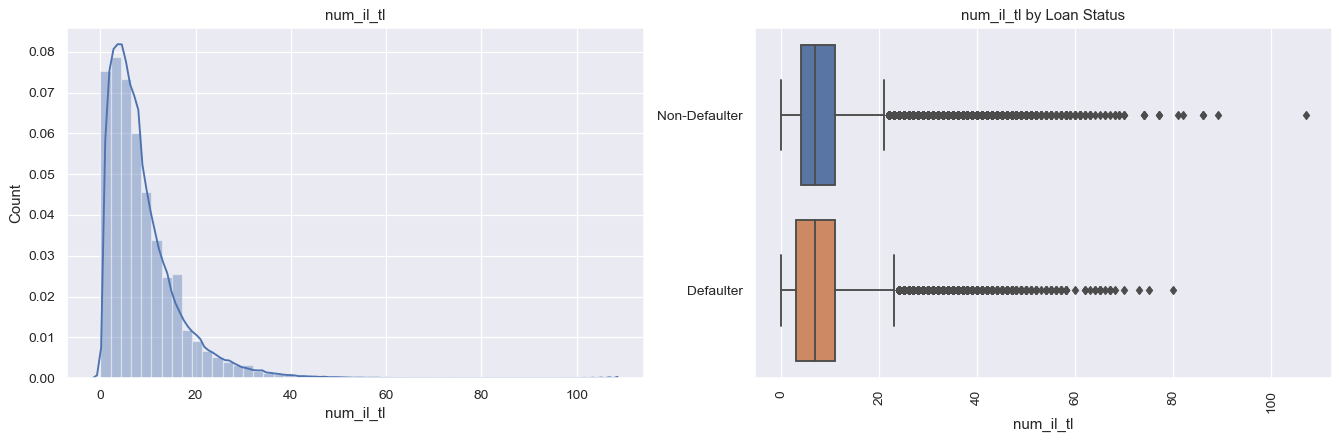

In [122]:
plot_feature('num_il_tl',True)

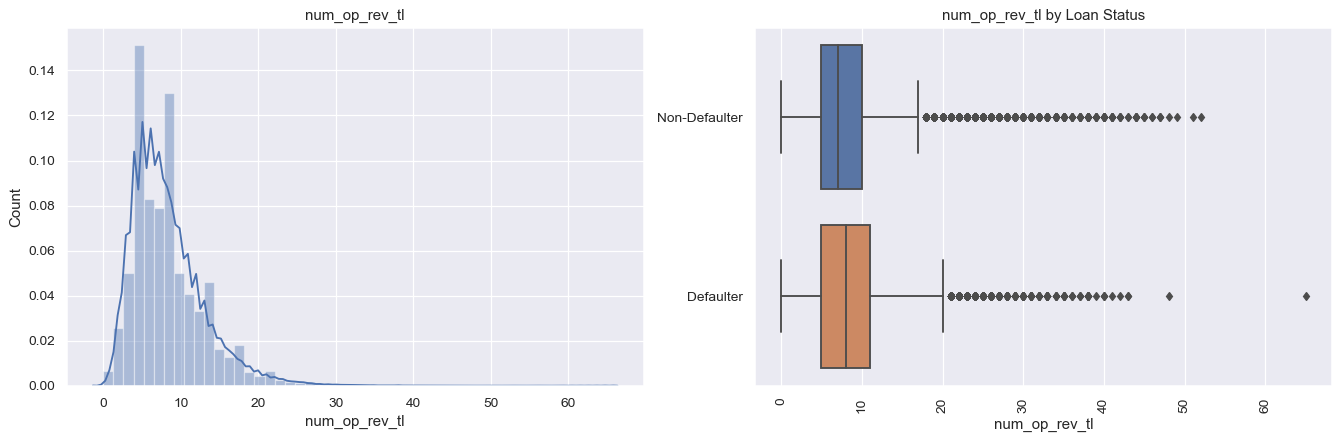

In [123]:
plot_feature('num_op_rev_tl',True)

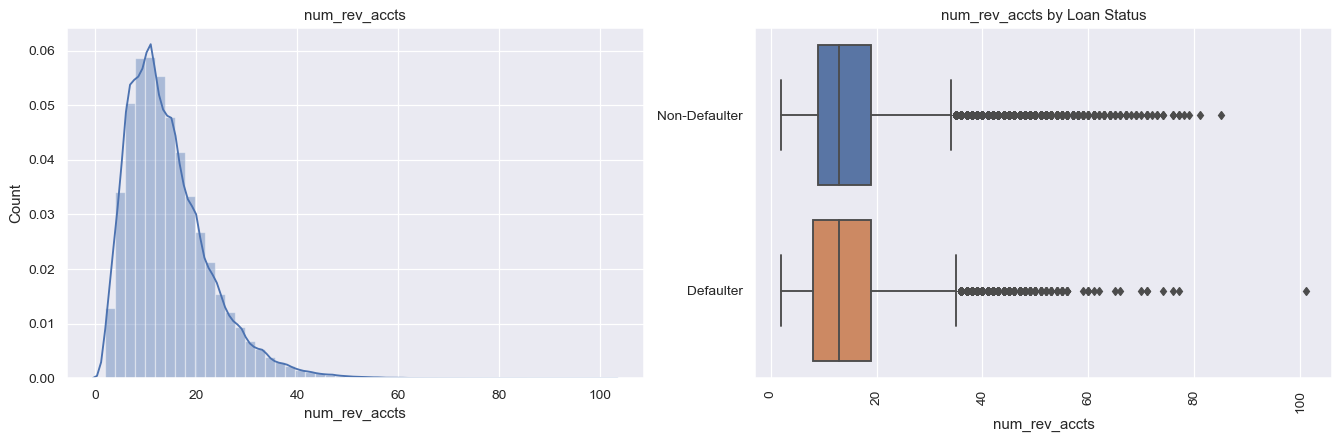

In [124]:
plot_feature('num_rev_accts',True)

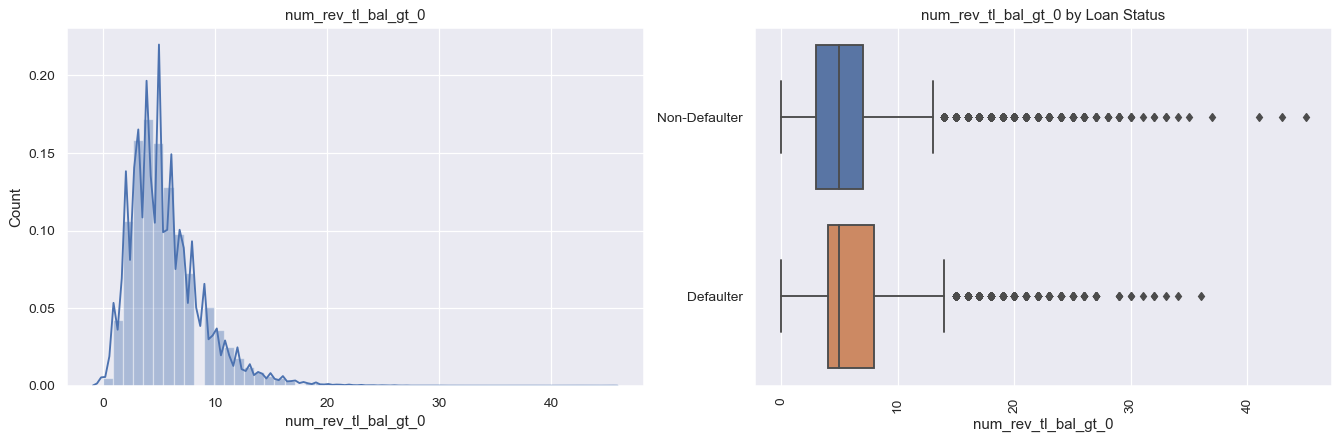

In [125]:
plot_feature('num_rev_tl_bal_gt_0',True)

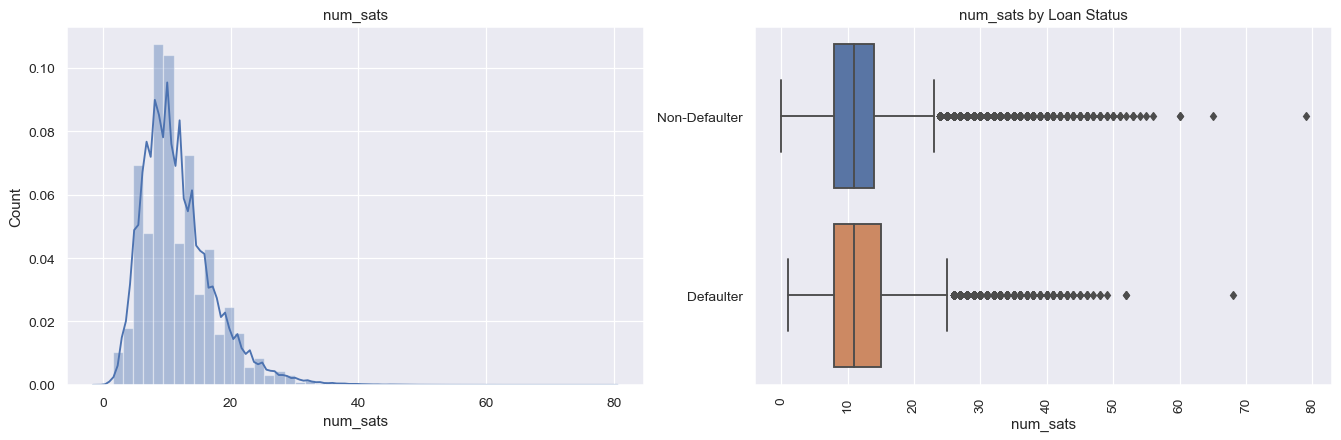

In [126]:
plot_feature('num_sats',True)

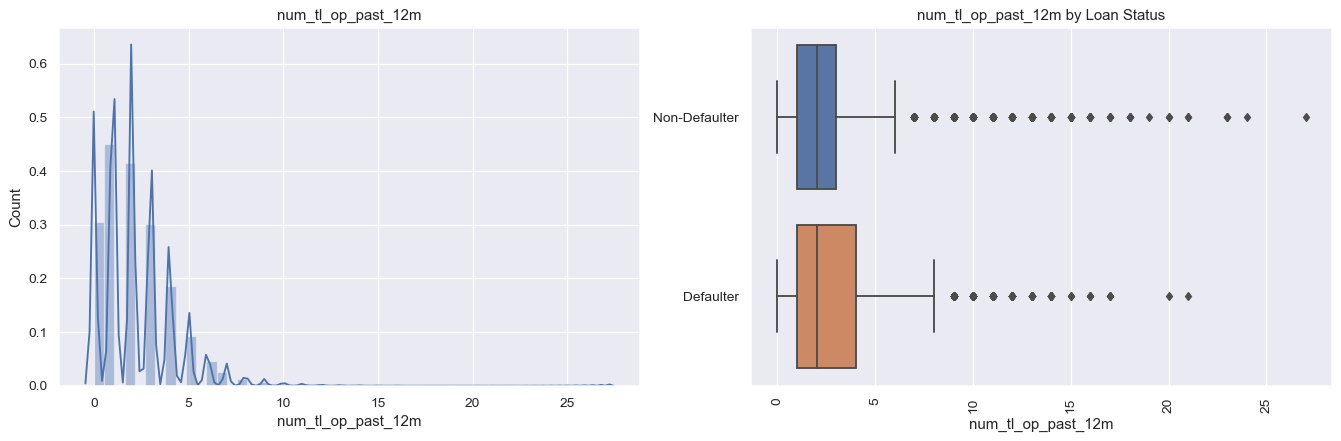

In [127]:
plot_feature('num_tl_op_past_12m',True)

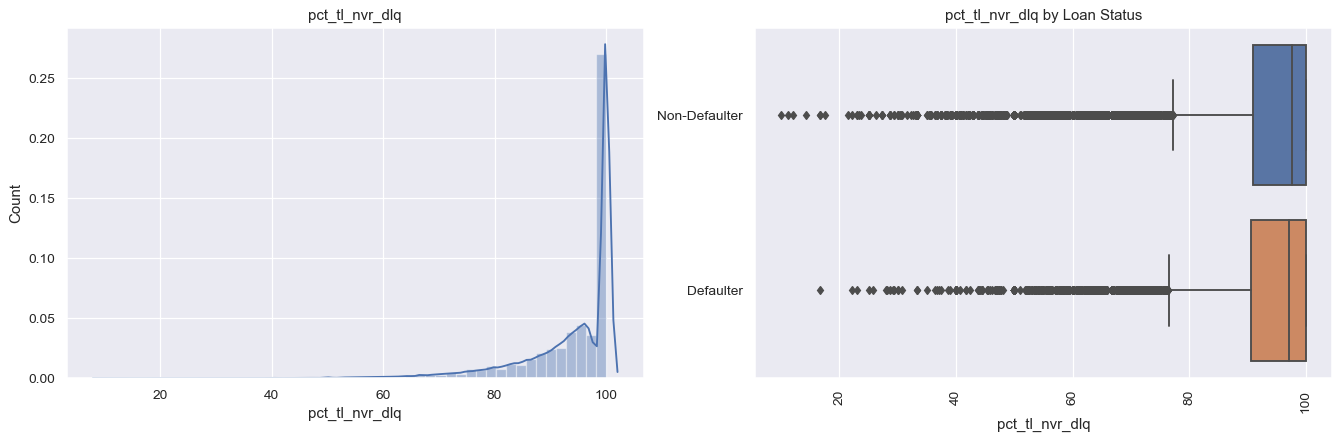

In [128]:
plot_feature('pct_tl_nvr_dlq',True)

In [129]:
features_to_be_removed.extend(['num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m'])

### Features 101 to 110

In [130]:
df.iloc[0:5,101:111]

,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,0.0,1,1,796617,66089,23500,84317,N,N
1,50.0,1,0,30914,21354,10100,15914,N,Y
2,75.0,0,0,28400,26184,4500,23900,N,N
3,100.0,0,0,25900,23290,15200,0,N,N
4,71.4,0,0,32058,12820,9800,15058,N,N


In [131]:
df.percent_bc_gt_75 = df.percent_bc_gt_75.fillna(0)

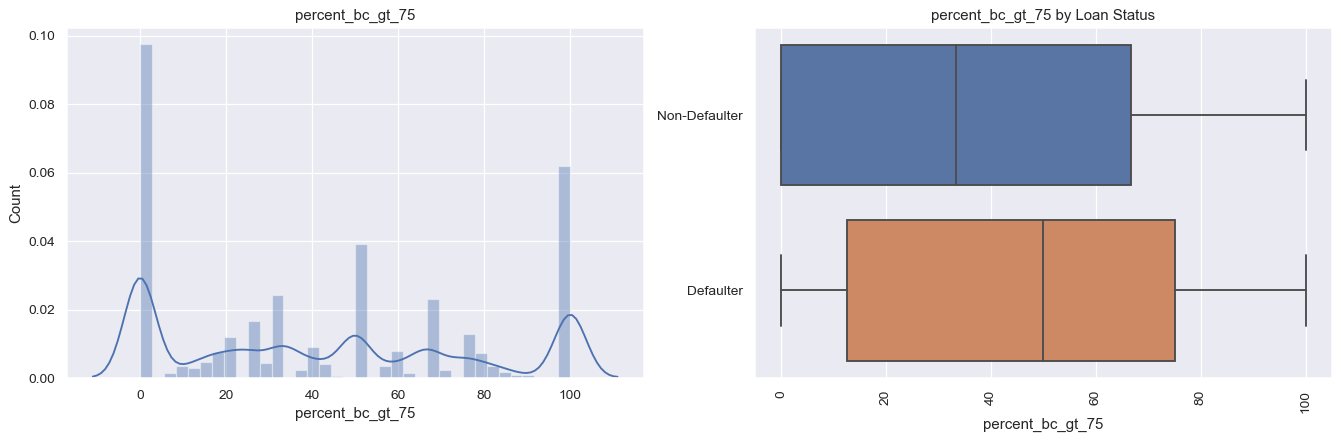

In [132]:
plot_feature('percent_bc_gt_75',True)

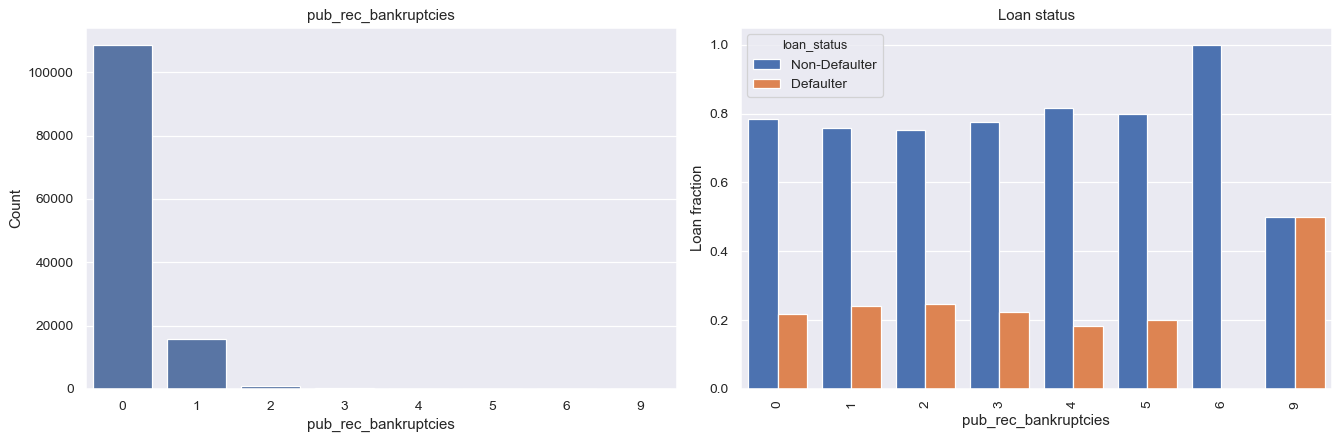

In [133]:
plot_feature('pub_rec_bankruptcies',False)

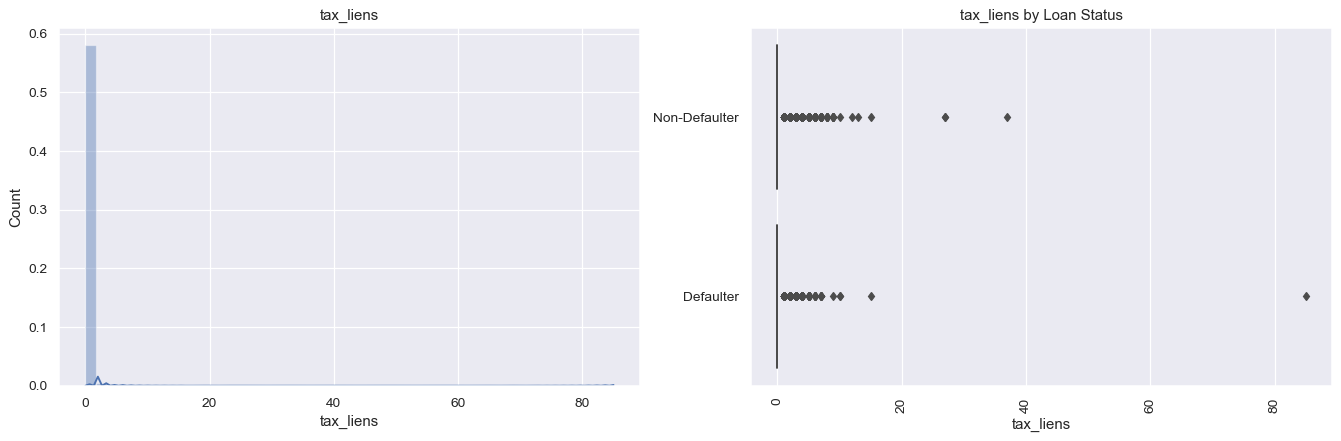

In [134]:
plot_feature('tax_liens',True)

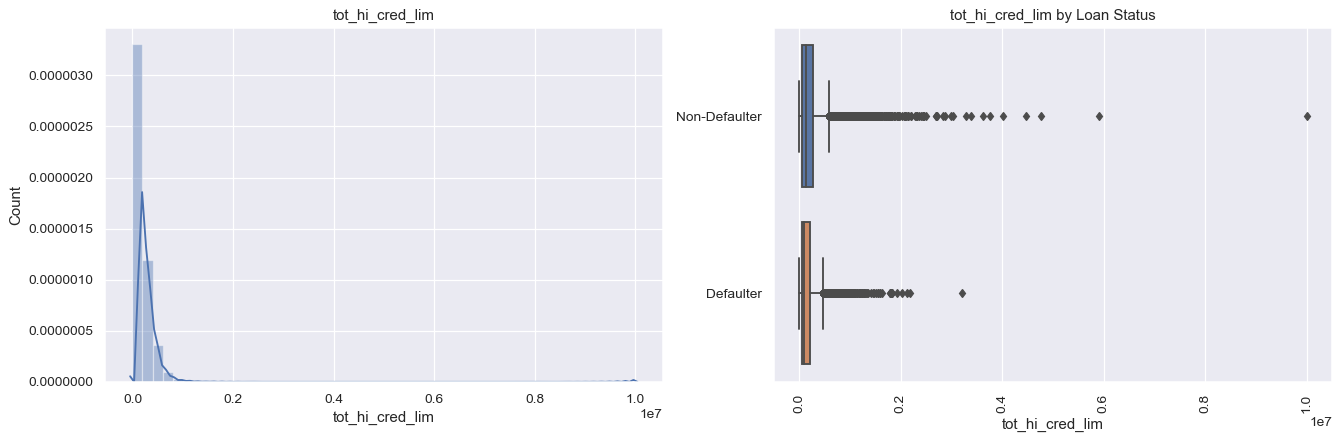

In [135]:
plot_feature('tot_hi_cred_lim',True)

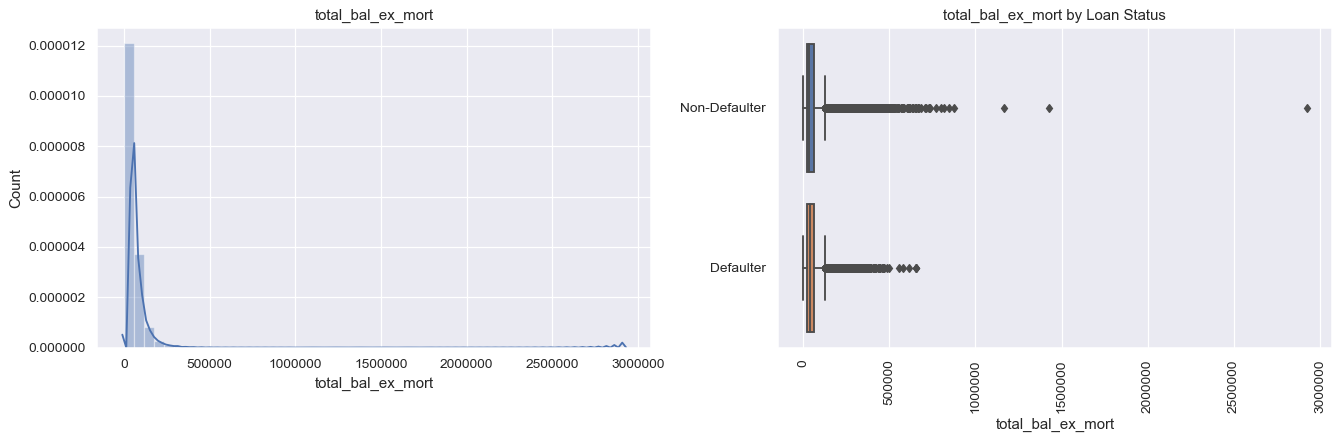

In [136]:
plot_feature('total_bal_ex_mort',True)

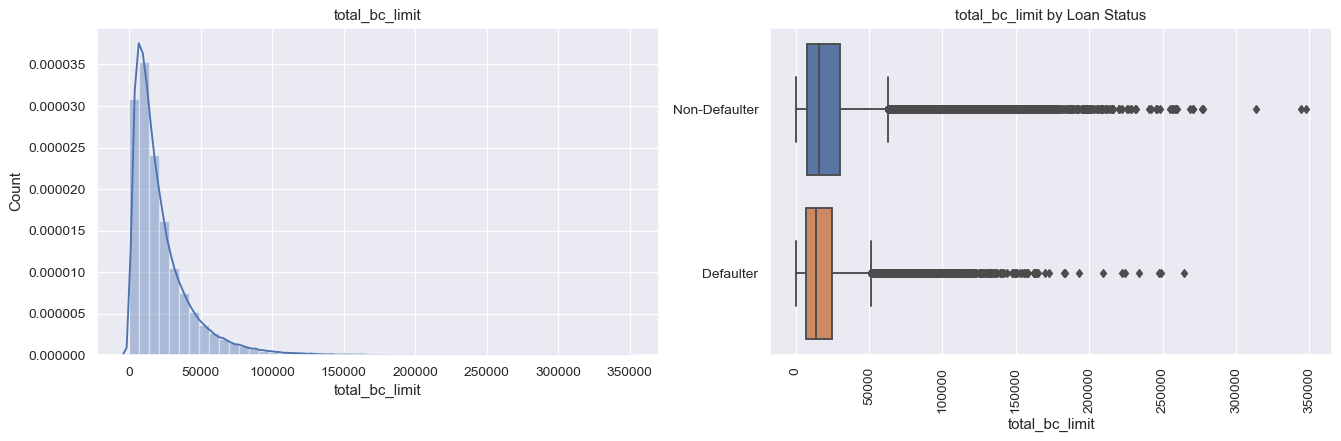

In [137]:
plot_feature('total_bc_limit',True)

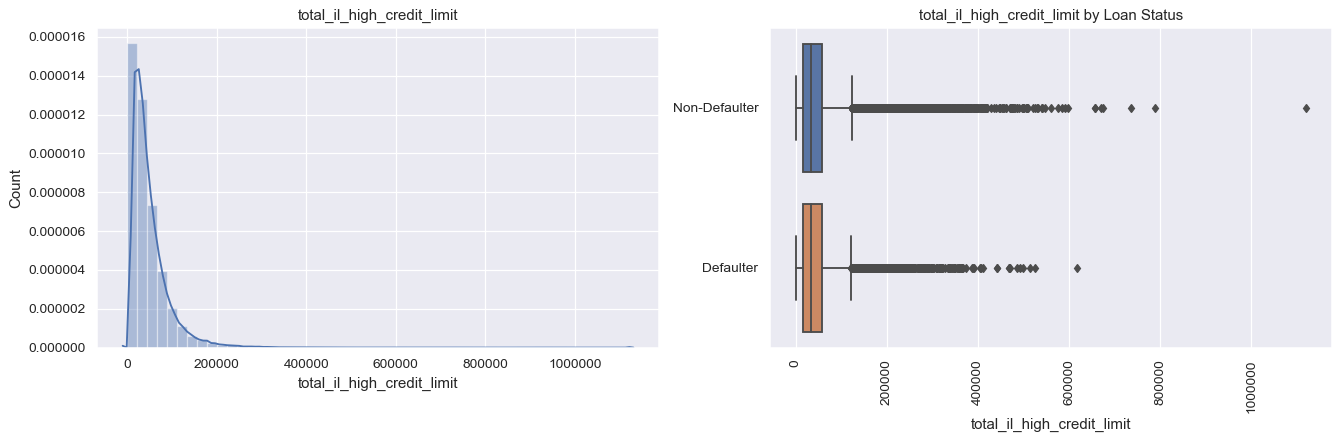

In [138]:
plot_feature('total_il_high_credit_limit',True)

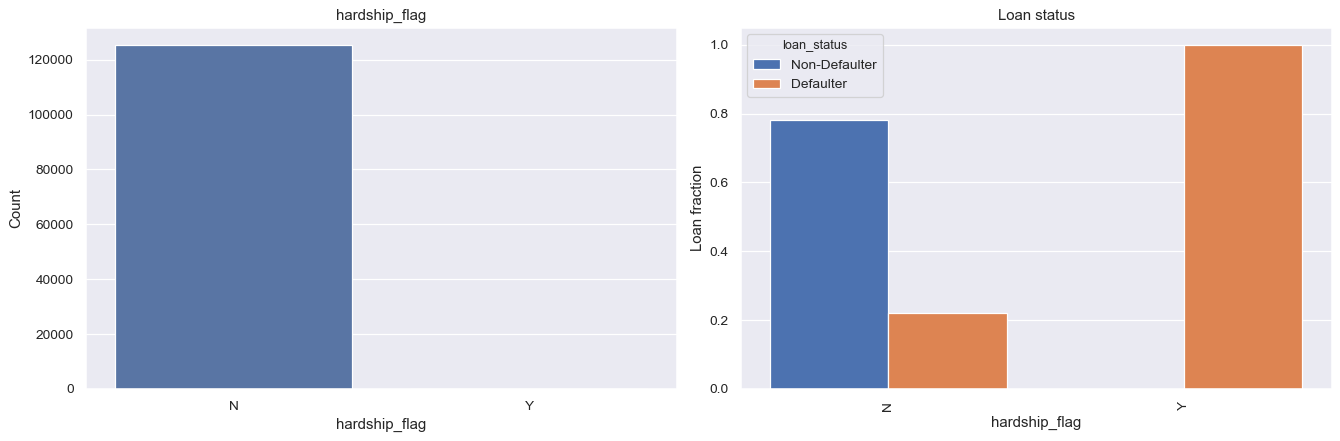

In [139]:
plot_feature('hardship_flag',False)

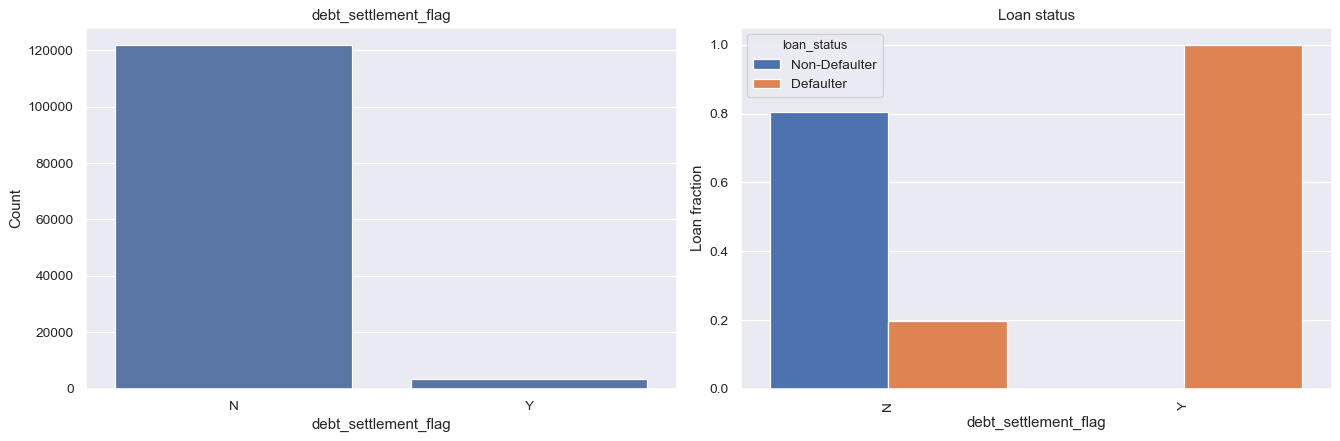

In [140]:
plot_feature('debt_settlement_flag',False)

## Feature Selection

In [141]:
df.shape

(125538, 110)

In [142]:
df['fico_score'] = (df['fico_range_low']+df['fico_range_high']+df['last_fico_range_low']+df['last_fico_range_high'])/4

In [143]:
df.shape

(125538, 111)

In [144]:
df = df.drop(features_to_be_removed,axis=1)

In [145]:
df.shape

(125538, 65)

In [146]:
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,fico_score
0,10000,36,12.99,B5,5,MORTGAGE,100000.0,Not Verified,Non-Defaulter,debt_consolidation,UT,20.60,1,2.0,27,2,8556,11.6,41,f,Individual,665575,0.0,0.0,0.0,0.0,0.0,0.0,76300,0.0,0.0,0.0,5,24651.0,20259.0,15.3,206.0,198,13,8,2,13.0,2.0,0,2,3,7,7,28,10,11.0,3,26,1,97.5,0.0,1,1,796617,66089,23500,84317,N,N,719.5
1,18300,60,15.99,D2,0,OWN,51000.0,Source Verified,Defaulter,debt_consolidation,NY,17.68,0,0.0,18,1,7650,51.0,48,w,Individual,21354,0.0,0.0,0.0,0.0,0.0,0.0,15000,0.0,0.0,0.0,7,1525.0,2462.0,75.6,131.0,439,4,4,0,4.0,4.0,0,6,7,8,19,15,17,33.0,7,18,3,100.0,50.0,1,0,30914,21354,10100,15914,N,Y,659.5
2,3600,36,17.57,D2,6,RENT,45000.0,Not Verified,Non-Defaulter,other,MN,16.08,1,1.0,8,0,3631,80.7,12,w,Individual,26184,0.0,0.0,0.0,0.0,0.0,0.0,4500,0.0,0.0,0.0,7,3273.0,869.0,80.7,90.0,67,12,6,0,12.0,3.0,2,4,4,3,5,7,4,5.0,4,7,2,90.9,75.0,0,0,28400,26184,4500,23900,N,N,644.5
3,13675,36,19.52,E2,1,RENT,38000.0,Verified,Non-Defaulter,debt_consolidation,LA,19.08,0,0.0,6,0,23290,89.9,21,f,Individual,23290,0.0,0.0,0.0,0.0,0.0,0.0,25900,0.0,0.0,0.0,1,3882.0,665.0,95.6,54.0,199,13,13,0,13.0,17.0,0,4,6,4,12,1,6,20.0,6,6,0,95.2,100.0,0,0,25900,23290,15200,0,N,N,687.0
4,14400,36,14.16,C2,1,RENT,55000.0,Not Verified,Non-Defaulter,debt_consolidation,TN,14.86,0,3.0,14,0,9389,55.2,63,f,Individual,12820,0.0,0.0,0.0,0.0,0.0,0.0,17000,0.0,0.0,0.0,8,916.0,4294.0,56.2,125.0,315,9,5,6,9.0,0.0,0,6,11,7,16,30,12,26.0,11,14,4,93.7,71.4,0,0,32058,12820,9800,15058,N,N,662.0


In [147]:
details =pd.DataFrame({'unique_values':df.nunique(),
                          'data_type': df.dtypes})
details = details.sort_values(by='unique_values')
details

,unique_values,data_type
application_type,2,object
loan_status,2,object
debt_settlement_flag,2,object
initial_list_status,2,object
term,2,int32
hardship_flag,2,object
verification_status,3,object
home_ownership,4,object
inq_last_6mths,7,float64
pub_rec_bankruptcies,8,int64


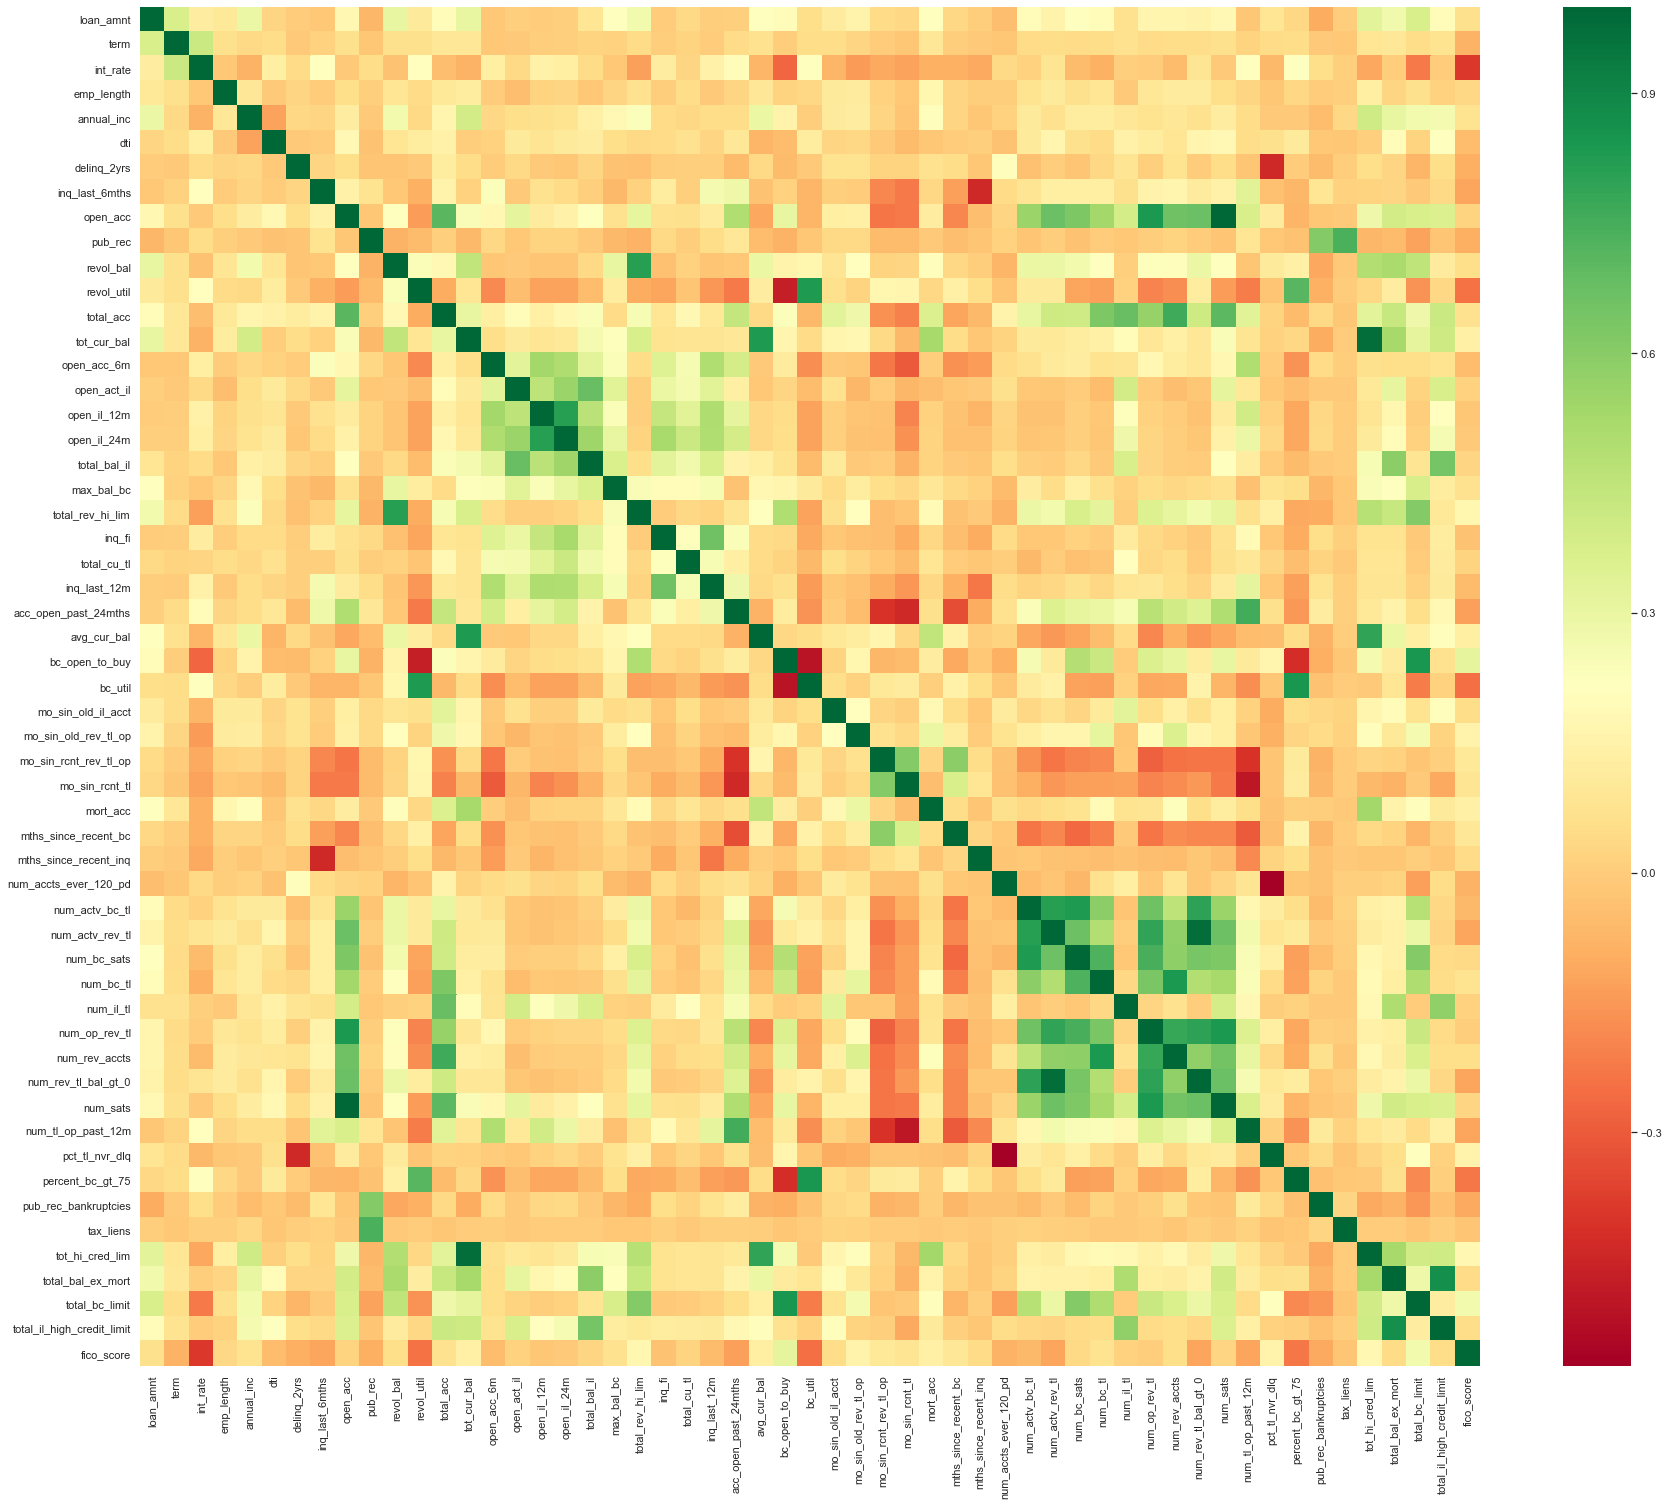

In [148]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),cmap='RdYlGn')

## Dropping High Correlation

In [149]:
corr_matrix = df.corr()
new_corr = corr_matrix.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

In [150]:
new_corr[new_corr.correlation > 0.80]

,level_0,level_1,correlation
2428,num_sats,open_acc,0.998756
2402,num_rev_tl_bal_gt_0,num_actv_rev_tl,0.980817
2763,tot_hi_cred_lim,tot_cur_bal,0.979185
2966,total_il_high_credit_limit,total_bal_ex_mort,0.865580
2612,percent_bc_gt_75,bc_util,0.843491
2886,total_bc_limit,bc_open_to_buy,0.842545
2349,num_rev_accts,num_bc_tl,0.838061
2263,num_op_rev_tl,open_acc,0.837395
2461,num_sats,num_op_rev_tl,0.836560
2126,num_bc_sats,num_actv_bc_tl,0.832277


In [151]:
df = df.drop(['open_acc','num_actv_rev_tl','tot_cur_bal'],axis=1)

In [152]:
df = df.drop(['total_il_high_credit_limit','percent_bc_gt_75','bc_open_to_buy','num_bc_tl','num_op_rev_tl',
              'num_bc_sats','avg_cur_bal','revol_util','open_il_12m','revol_bal','num_actv_bc_tl','num_rev_tl_bal_gt_0'],axis=1)

In [153]:
df = df.drop(['total_acc','acc_open_past_24mths'],axis=1)

In [154]:
df.shape

(125538, 48)

In [155]:
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,initial_list_status,application_type,open_acc_6m,open_act_il,open_il_24m,total_bal_il,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_il_tl,num_rev_accts,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,hardship_flag,debt_settlement_flag,fico_score
0,10000,36,12.99,B5,5,MORTGAGE,100000.0,Not Verified,Non-Defaulter,debt_consolidation,UT,20.60,1,2.0,2,f,Individual,0.0,0.0,0.0,0.0,0.0,76300,0.0,0.0,0.0,15.3,206.0,198,13,8,2,13.0,2.0,0,28,11.0,26,1,97.5,1,1,796617,66089,23500,N,N,719.5
1,18300,60,15.99,D2,0,OWN,51000.0,Source Verified,Defaulter,debt_consolidation,NY,17.68,0,0.0,1,w,Individual,0.0,0.0,0.0,0.0,0.0,15000,0.0,0.0,0.0,75.6,131.0,439,4,4,0,4.0,4.0,0,15,33.0,18,3,100.0,1,0,30914,21354,10100,N,Y,659.5
2,3600,36,17.57,D2,6,RENT,45000.0,Not Verified,Non-Defaulter,other,MN,16.08,1,1.0,0,w,Individual,0.0,0.0,0.0,0.0,0.0,4500,0.0,0.0,0.0,80.7,90.0,67,12,6,0,12.0,3.0,2,7,5.0,7,2,90.9,0,0,28400,26184,4500,N,N,644.5
3,13675,36,19.52,E2,1,RENT,38000.0,Verified,Non-Defaulter,debt_consolidation,LA,19.08,0,0.0,0,f,Individual,0.0,0.0,0.0,0.0,0.0,25900,0.0,0.0,0.0,95.6,54.0,199,13,13,0,13.0,17.0,0,1,20.0,6,0,95.2,0,0,25900,23290,15200,N,N,687.0
4,14400,36,14.16,C2,1,RENT,55000.0,Not Verified,Non-Defaulter,debt_consolidation,TN,14.86,0,3.0,0,f,Individual,0.0,0.0,0.0,0.0,0.0,17000,0.0,0.0,0.0,56.2,125.0,315,9,5,6,9.0,0.0,0,30,26.0,14,4,93.7,0,0,32058,12820,9800,N,N,662.0


In [156]:
details =pd.DataFrame({'unique_values':df.nunique(),
                          'data_type': df.dtypes})
details = details.sort_values(by='unique_values')
details

,unique_values,data_type
initial_list_status,2,object
term,2,int32
hardship_flag,2,object
debt_settlement_flag,2,object
loan_status,2,object
application_type,2,object
verification_status,3,object
home_ownership,4,object
inq_last_6mths,7,float64
pub_rec_bankruptcies,8,int64


In [157]:
df['loan_status'].value_counts(normalize=True)*100

Non-Defaulter    77.977983
Defaulter        22.022017
Name: loan_status, dtype: float64

In [158]:
df['loan_status'] = df['loan_status'].replace(['Non-Defaulter','Defaulter'],[0,1])

In [159]:
df['loan_status'].value_counts()

0    97892
1    27646
Name: loan_status, dtype: int64

In [160]:
obj_columns = df.select_dtypes('object').columns.tolist()
df[obj_columns] = df[obj_columns].astype('category')

In [161]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
list = df.select_dtypes(include='category').columns
for i in list:
    df[i]= labelencoder.fit_transform(df[i])
    print(i)
df[list] = df[list].astype('category')

sub_grade
home_ownership
verification_status
purpose
addr_state
initial_list_status
application_type
hardship_flag
debt_settlement_flag


In [162]:
details =pd.DataFrame({'unique_values':df.nunique(),
                          'data_type': df.dtypes})
details = details.sort_values(by='unique_values')
details

,unique_values,data_type
initial_list_status,2,category
term,2,int32
hardship_flag,2,category
debt_settlement_flag,2,category
loan_status,2,int64
application_type,2,category
verification_status,3,category
home_ownership,4,category
inq_last_6mths,7,float64
pub_rec_bankruptcies,8,int64


In [163]:
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,initial_list_status,application_type,open_acc_6m,open_act_il,open_il_24m,total_bal_il,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_il_tl,num_rev_accts,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,hardship_flag,debt_settlement_flag,fico_score
0,10000,36,12.99,9,5,1,100000.0,0,0,2,43,20.60,1,2.0,2,0,0,0.0,0.0,0.0,0.0,0.0,76300,0.0,0.0,0.0,15.3,206.0,198,13,8,2,13.0,2.0,0,28,11.0,26,1,97.5,1,1,796617,66089,23500,0,0,719.5
1,18300,60,15.99,16,0,2,51000.0,1,1,2,33,17.68,0,0.0,1,1,0,0.0,0.0,0.0,0.0,0.0,15000,0.0,0.0,0.0,75.6,131.0,439,4,4,0,4.0,4.0,0,15,33.0,18,3,100.0,1,0,30914,21354,10100,0,1,659.5
2,3600,36,17.57,16,6,3,45000.0,0,0,8,22,16.08,1,1.0,0,1,0,0.0,0.0,0.0,0.0,0.0,4500,0.0,0.0,0.0,80.7,90.0,67,12,6,0,12.0,3.0,2,7,5.0,7,2,90.9,0,0,28400,26184,4500,0,0,644.5
3,13675,36,19.52,21,1,3,38000.0,2,0,2,17,19.08,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,25900,0.0,0.0,0.0,95.6,54.0,199,13,13,0,13.0,17.0,0,1,20.0,6,0,95.2,0,0,25900,23290,15200,0,0,687.0
4,14400,36,14.16,11,1,3,55000.0,0,0,2,41,14.86,0,3.0,0,0,0,0.0,0.0,0.0,0.0,0.0,17000,0.0,0.0,0.0,56.2,125.0,315,9,5,6,9.0,0.0,0,30,26.0,14,4,93.7,0,0,32058,12820,9800,0,0,662.0


In [164]:
dummy_df = pd.get_dummies(data = df, prefix = None, prefix_sep='_',
               drop_first =True,
              dtype='int8')

In [165]:
dummy_df.shape

(125538, 143)

## Model Building

In [260]:
X = dummy_df.drop(['loan_status'],1)
y = dummy_df.loan_status

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,log_loss,roc_curve,roc_auc_score
from sklearn.metrics import auc,roc_curve,make_scorer,f1_score

In [169]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,log_loss,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [170]:
MLA = []
m = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() , GaussianNB() ,
    RandomForestClassifier() , GradientBoostingClassifier()]

M = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" , "GaussianNB" ,
    "RandomForestClassifier" , "GradientBoostingClassifier"]

for i in range(0,len(m)):
    model = m[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    MLA.append(accuracy_score(pred , y_test))

C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [171]:
d = { "Algorithm" : M,"Accuracy" : MLA  }
dfmla = pd.DataFrame(d)
dfmla

,Algorithm,Accuracy
0,LinearSVC,0.591286
1,DecisionTreeClassifier,0.863749
2,LogisticRegression,0.856779
3,KNeighborsClassifier,0.743548
4,GaussianNB,0.852796
5,RandomForestClassifier,0.889916
6,GradientBoostingClassifier,0.911383


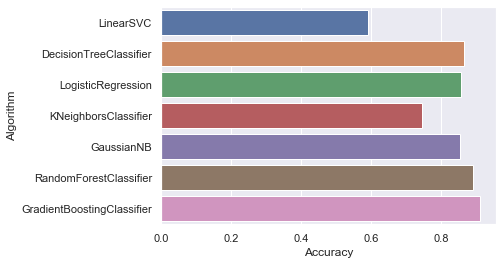

In [172]:
sns.barplot(x="Accuracy", y="Algorithm", data=dfmla)

### 1.Logistic Regression

In [173]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred_lg= lg.predict(X_test)

lg_score_train = lg.score(X_train,y_train)
print("Train Prediction Score",lg_score_train*100)
lg_score_test = accuracy_score(y_test,y_pred_lg)
print("Test Prediction Score",lg_score_test*100)

confusion_matrix(y_test, y_pred_lg)

C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Prediction Score 85.83391416907298
Test Prediction Score 85.67787159471085


array([[18890,   688],
       [ 2908,  2622]], dtype=int64)

AUC: 0.856


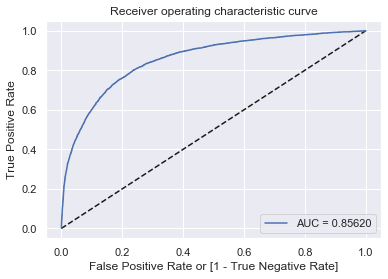

In [247]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# predict probabilities
probs = lg.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

# show the plot
plt.show()

### 2.Random Forest

In [175]:
# Parameter Tuning

param_grid={'max_depth':range(1,15,2),
            'n_estimators':[125,250],
            'max_features':range(1,15,2)}

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=42)

from sklearn.model_selection import RandomizedSearchCV
dt_cv = RandomizedSearchCV(rf,param_grid,cv=kf,scoring=make_scorer(f1_score,average='weighted'),n_jobs=-1)
dt_cv.fit(X_train,y_train)    

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_le...
                                                    n_estimators='warn',
 

In [176]:
print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'n_estimators': 250, 'max_features': 13, 'max_depth': 11}
Accuracy : 0.8947611425684663


In [177]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,n_estimators=250,max_features=13,max_depth=13)
rf.fit(X_train,y_train)

y_pred_rf= rf.predict(X_test)

#Score of Prediction
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)

rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

confusion_matrix(y_test, y_pred_rf)

Train Prediction Score 92.71034551428856
Test Prediction Score 90.23418830651585


array([[18864,   714],
       [ 1738,  3792]], dtype=int64)

In [178]:
expected = y_test
predicted = rf.predict(X_test)
from sklearn.metrics import classification_report
class_report = classification_report(expected,predicted,target_names=['Non-Defaulter','Defaulter'])
print(class_report)

               precision    recall  f1-score   support

Non-Defaulter       0.92      0.96      0.94     19578
    Defaulter       0.84      0.69      0.76      5530

     accuracy                           0.90     25108
    macro avg       0.88      0.82      0.85     25108
 weighted avg       0.90      0.90      0.90     25108



AUC: 0.940


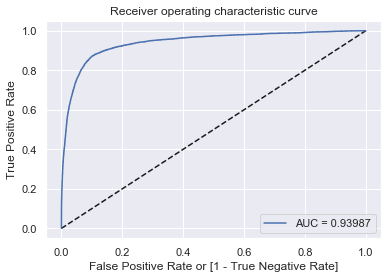

In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# predict probabilities
probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

# show the plot
plt.show()

In [180]:
feat_importance = rf.feature_importances_

Text(0, 0.5, 'Relative Importance')

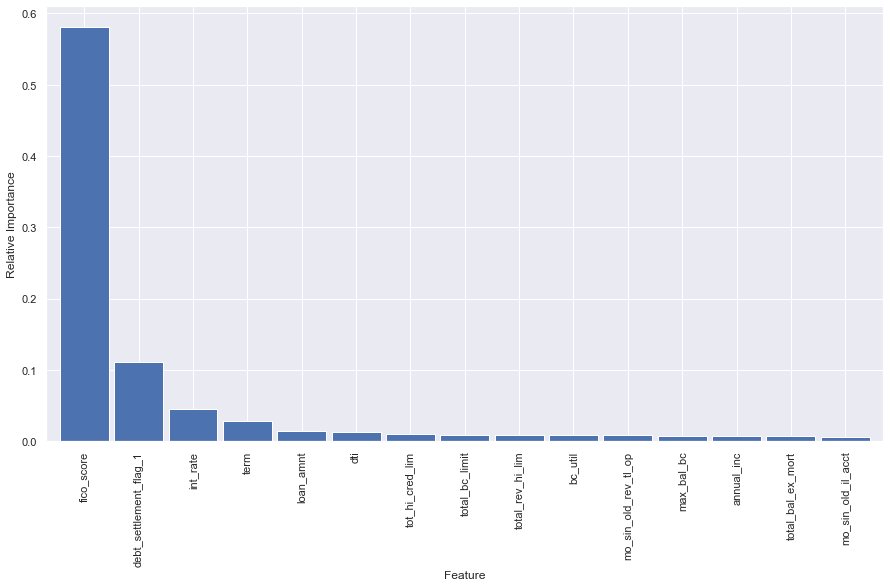

In [181]:
r = pd.DataFrame(columns=['Feature','Importance'])
ncomp = 15
r['Feature'] = feat_labels = X_train.columns
r['Importance'] = rf.feature_importances_
r.set_index(r['Feature'], inplace=True)
ax = r.sort_values('Importance', ascending=False)[:ncomp].plot.bar(width=0.9, legend=False, figsize=(15,8))
ax.set_ylabel('Relative Importance')

### 3.KNN

In [182]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [183]:
knn = KNeighborsClassifier(14)
knn.fit(X_train_sc,y_train)

y_pred_knn= knn.predict(X_test_sc)

knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction Score",knn_score_test*100)

confusion_matrix(y_test, y_pred_knn)

Train Prediction Score 77.97869162600817
Test Prediction Score 80.46041102437471


array([[19333,   245],
       [ 4661,   869]], dtype=int64)

### 4.CART

In [184]:
# Parameter Tuning

param_grid={'criterion':['gini','entropy'],
            'max_depth':range(1,15,2),
            'max_features':range(1,15,2)}

from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=42)

from sklearn.model_selection import RandomizedSearchCV
dt_cv = RandomizedSearchCV(dt,param_grid,cv=kf,scoring=make_scorer(f1_score,average='weighted'),n_jobs=-1)
dt_cv.fit(X_train,y_train)  

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=42,
    

In [185]:
print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_features': 9, 'max_depth': 11, 'criterion': 'gini'}
Accuracy : 0.8110019672742632


In [186]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=13,max_features=13,random_state = 100)
dt.fit(X_train,y_train)

y_pred_dt= dt.predict(X_test)

#Score of Prediction
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

#finding confusion matrix
confusion_matrix(y_test,y_pred_dt)

Train Prediction Score 90.37339440406254
Test Prediction Score 88.34236100047794


array([[18273,  1305],
       [ 1622,  3908]], dtype=int64)

In [187]:
expected = y_test
predicted = dt.predict(X_test)
from sklearn.metrics import classification_report
class_report = classification_report(expected,predicted,target_names=['Non-Defaulter','Defaulter'])
print(class_report)

               precision    recall  f1-score   support

Non-Defaulter       0.92      0.93      0.93     19578
    Defaulter       0.75      0.71      0.73      5530

     accuracy                           0.88     25108
    macro avg       0.83      0.82      0.83     25108
 weighted avg       0.88      0.88      0.88     25108



AUC: 0.893


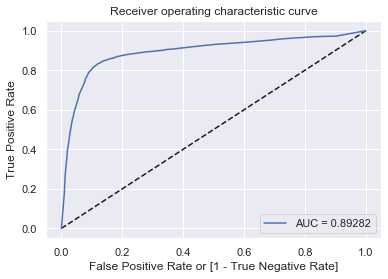

In [188]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# predict probabilities
probs = dt.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

# show the plot
plt.show()

Text(0, 0.5, 'Relative Importance')

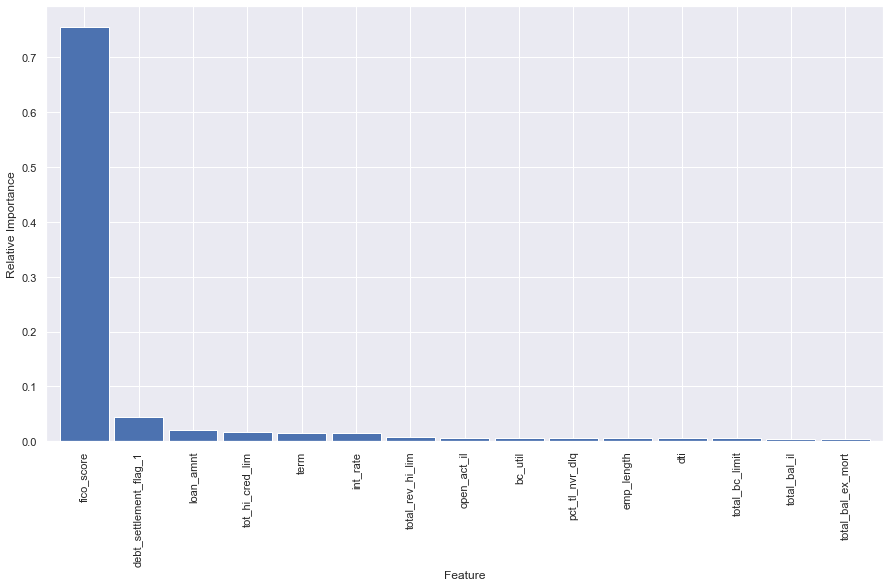

In [189]:
r = pd.DataFrame(columns=['Feature','Importance'])
ncomp = 15
r['Feature'] = feat_labels = X_train.columns
r['Importance'] = dt.feature_importances_
r.set_index(r['Feature'], inplace=True)
ax = r.sort_values('Importance', ascending=False)[:ncomp].plot.bar(width=0.9, legend=False, figsize=(15,8))
ax.set_ylabel('Relative Importance')

### 5.Naive Bayes

### (i)Gaussian

In [190]:
nbg = GaussianNB()
nbg.fit(X_train,y_train)

y_pred_nbg= nbg.predict(X_test)

nbg_score_train = nbg.score(X_train,y_train)
print("Train Prediction Score",nbg_score_train*100)
nbg_score_test = accuracy_score(y_test,y_pred_nbg)
print("Test Prediction Score",nbg_score_test*100)

confusion_matrix(y_test, y_pred_nbg)

Train Prediction Score 85.30618341133128
Test Prediction Score 85.27959216186076


array([[17434,  2144],
       [ 1552,  3978]], dtype=int64)

AUC: 0.859


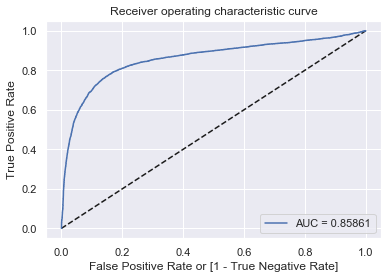

In [191]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# predict probabilities
probs = nbg.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

# show the plot
plt.show()

### (ii) Bernoulli's

In [192]:
nbb = BernoulliNB()
nbb.fit(X_train,y_train)

y_pred_nbb= nbb.predict(X_test)

nbb_score_train = nbb.score(X_train,y_train)
print("Train Prediction Score",nbb_score_train*100)
nbb_score_test = accuracy_score(y_test,y_pred_nbb)
print("Test Prediction Score",nbb_score_test*100)

confusion_matrix(y_test, y_pred_nbb)

Train Prediction Score 78.32520163297819
Test Prediction Score 78.1862354628007


array([[17908,  1670],
       [ 3807,  1723]], dtype=int64)

AUC: 0.715


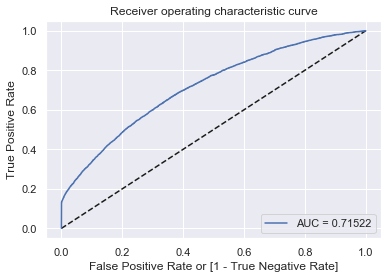

In [193]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# predict probabilities
probs = nbb.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

# show the plot
plt.show()

# Ensemble Methods

In [194]:
import warnings
warnings.filterwarnings("ignore")

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import auc,roc_curve,make_scorer
from sklearn import metrics

In [196]:
bag_lg = BaggingClassifier(base_estimator=lg,random_state=100,n_estimators=10)
bag_dt = BaggingClassifier(base_estimator=dt,random_state=100,n_estimators=10)
bag_knn = BaggingClassifier(base_estimator=knn,random_state=100,n_estimators=10)
bag_nbg = BaggingClassifier(base_estimator=nbg,random_state=100,n_estimators=10)

In [197]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [198]:
boo_lg=AdaBoostClassifier(base_estimator=lg,n_estimators=50,random_state=100)
boo_dt=AdaBoostClassifier(base_estimator=dt,n_estimators=50,random_state=100)
boo_nbg=AdaBoostClassifier(base_estimator=nbg,n_estimators=50,random_state=100)
gboo =GradientBoostingClassifier(n_estimators=100,random_state=100)

## Gradient Boosting

In [207]:
from sklearn.ensemble import GradientBoostingClassifier
gboo =GradientBoostingClassifier(n_estimators=100,random_state=100)
gboo.fit(X_train,y_train)

y_pred_gboo= gboo.predict(X_test)

#Score of Prediction
gboo_score_train = gboo.score(X_train,y_train)
print("Train Prediction Score",gboo_score_train*100)

gboo_score_test = accuracy_score(y_test,y_pred_gboo)
print("Test Prediction Score",gboo_score_test*100)

confusion_matrix(y_test, y_pred_gboo)

Train Prediction Score 91.2187593348601
Test Prediction Score 91.13828261908556


array([[18635,   943],
       [ 1282,  4248]], dtype=int64)

AUC: 0.951


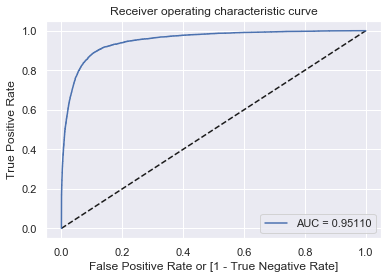

In [208]:
# predict probabilities
probs = gboo.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

# show the plot
plt.show()

Text(0, 0.5, 'Relative Importance')

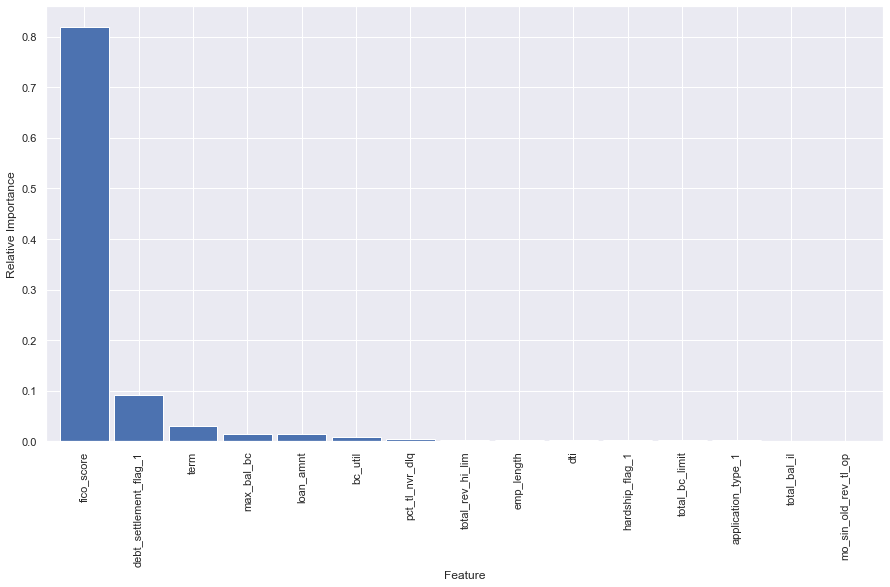

In [212]:
r = pd.DataFrame(columns=['Feature','Importance'])
ncomp = 15
r['Feature'] = feat_labels = X_train.columns
r['Importance'] = gboo.feature_importances_
r.set_index(r['Feature'], inplace=True)
ax = r.sort_values('Importance', ascending=False)[:ncomp].plot.bar(width=0.9, legend=False, figsize=(15,8))
ax.set_ylabel('Relative Importance')

## Stacking Models

In [240]:
# Soft-voting

stack_soft = VotingClassifier(estimators=[("GBoost",gboo),("RandomForest",rf),("Bagging-DT",bag_dt)],voting='soft')
stack_hard = VotingClassifier(estimators=[("GBoost",gboo),("RandomForest",rf),("Bagging-DT",bag_dt)])

### i) Soft - Voting

In [235]:
stack_soft.fit(X_train,y_train)

y_pred_stack_soft= stack_soft.predict(X_test)

#Score of Prediction
stack_soft_score_train = stack_soft.score(X_train,y_train)
print("Train Prediction Score",stack_soft_score_train*100)

stack_soft_score_test = accuracy_score(y_test,y_pred_stack_soft)
print("Test Prediction Score",stack_soft_score_test*100)

confusion_matrix(y_test, y_pred_stack_soft)

Train Prediction Score 92.06910285771184
Test Prediction Score 90.81169348414848


array([[18737,   841],
       [ 1466,  4064]], dtype=int64)

AUC: 0.945


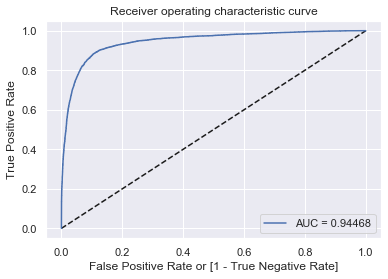

In [236]:
# predict probabilities
probs = stack_soft.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

# show the plot
plt.show()

### i) Hard - Voting

In [241]:
stack_hard.fit(X_train,y_train)

y_pred_stack_hard= stack_hard.predict(X_test)

#Score of Prediction
stack_hard_score_train = stack_hard.score(X_train,y_train)
print("Train Prediction Score",stack_hard_score_train*100)

stack_hard_score_test = accuracy_score(y_test,y_pred_stack_hard)
print("Test Prediction Score",stack_hard_score_test*100)

confusion_matrix(y_test, y_pred_stack_hard)

Train Prediction Score 92.36383550731853
Test Prediction Score 90.56476023578142


array([[18800,   778],
       [ 1591,  3939]], dtype=int64)

# Model Comparision

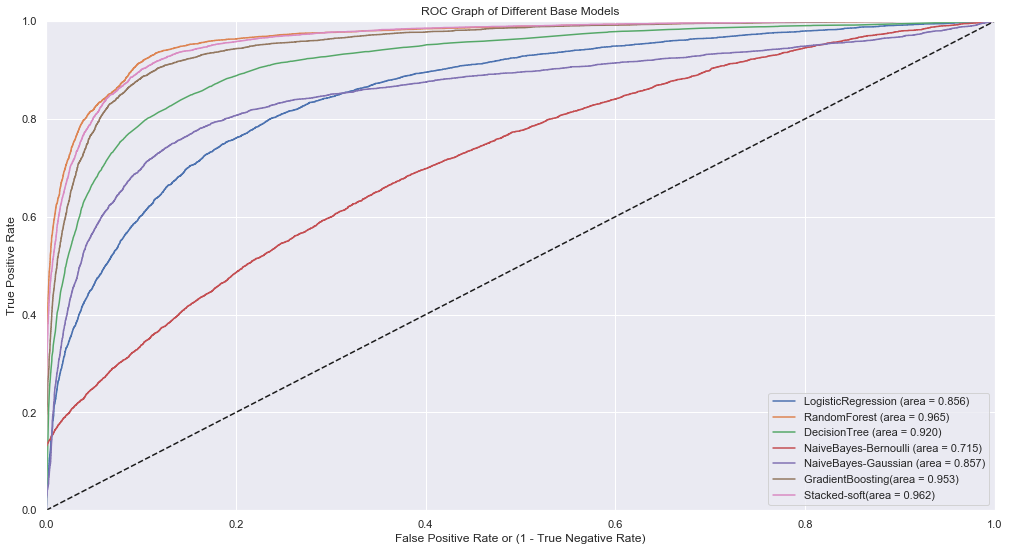

In [262]:
# Create ROC Graph
from sklearn.metrics import roc_curve
plt.figure(figsize=(17,9))

fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
nbb_fpr, nbb_tpr, nbb_thresholds = roc_curve(y_test, nbb.predict_proba(X_test)[:,1])
nbg_fpr, nbg_tpr, nbg_thresholds = roc_curve(y_test, nbg.predict_proba(X_test)[:,1])
gboo_fpr, gboo_tpr, gboo_thresholds = roc_curve(y_test, gboo.predict_proba(X_test)[:,1])
stack_fpr, stack_tpr, stack_thresholds = roc_curve(y_test, stack_soft.predict_proba(X_test)[:,1])


auc_lg = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
auc_nbb = roc_auc_score(y_test,nbb.predict_proba(X_test)[:,1])
auc_nbg = roc_auc_score(y_test, nbg.predict_proba(X_test)[:,1])
auc_gboo = roc_auc_score(y_test, gboo.predict_proba(X_test)[:,1])
auc_stack = roc_auc_score(y_test, stack_soft.predict_proba(X_test)[:,1])



# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='LogisticRegression (area = %0.3f)' % auc_lg)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='RandomForest (area = %0.3f)' % auc_rf)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='DecisionTree (area = %0.3f)' % auc_dt)

# Plot Naive bayes ROC
plt.plot(nbb_fpr, nbb_tpr, label='NaiveBayes-Bernoulli (area = %0.3f)' % auc_nbb)

# Plot Naive bayes ROC
plt.plot(nbg_fpr, nbg_tpr, label='NaiveBayes-Gaussian (area = %0.3f)' % auc_nbg)

# Plot Gradient Boosting ROC
plt.plot(gboo_fpr, gboo_tpr, label='GradientBoosting(area = %0.3f)' % auc_gboo)

# Plot Stacked Soft ROC
plt.plot(stack_fpr, stack_tpr, label='Stacked-soft(area = %0.3f)' % auc_stack)


# Plot Base Rate ROC
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - True Negative Rate)')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph of Different Base Models')
plt.legend(loc="lower right")
plt.show()

In [243]:
models=[]
models.append(("log",lg))
models.append(('Bag-Log',bag_lg))
models.append(('Boost-Log', boo_lg))
models.append(('DT',dt))
models.append(('Bag-DT',bag_dt))
models.append(('Boost-DT',boo_dt))
models.append(('GBoost',gboo))
models.append(('KNN',knn))
models.append(('Bag-KNN',bag_knn))
models.append(('NBG',nbg))
models.append(('Bag-NBG',bag_nbg))
models.append(('Boost-NBG',boo_nbg))
models.append(('RF',rf))
models.append(('Stack-S',stack_soft))
models.append(('Stack-H',stack_hard))

## Kfold - 3

log: 0.691188 (0.001654)
Bag-Log: 0.707336 (0.000657)
Boost-Log: 0.725401 (0.000358)
DT: 0.778664 (0.000357)
Bag-DT: 0.768315 (0.001302)
Boost-DT: 0.773611 (0.000743)
GBoost: 0.851438 (0.000581)
KNN: 0.506143 (0.000001)
Bag-KNN: 0.508466 (0.000001)
NBG: 0.802375 (0.000646)
Bag-NBG: 0.797150 (0.000444)
Boost-NBG: 0.551510 (0.001534)
RF: 0.814860 (0.000829)
Stack-S: 0.834119 (0.000647)
Stack-H: 0.824013 (0.000713)


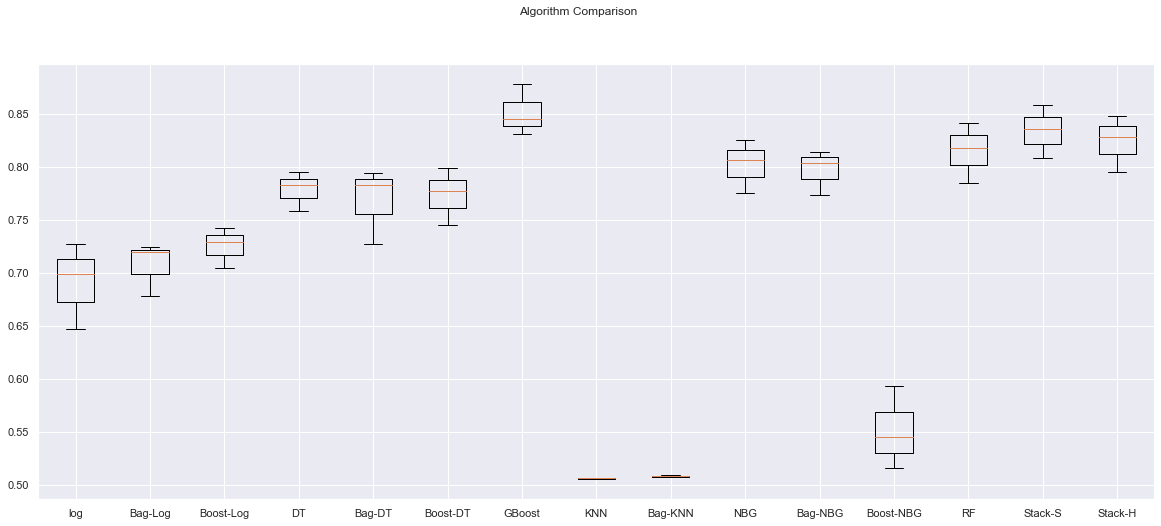

In [244]:
from matplotlib.pyplot import figure
from sklearn import model_selection

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=3,random_state=2)
    cv_results = model_selection.cross_val_score(model,X,y, cv=kfold,scoring =make_scorer(roc_auc_score))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var(ddof=1))
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Kfold - 5

In [245]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
kf=KFold(n_splits=5,shuffle=True,random_state=0)
bias=[]
var=[]
for model,name in zip([lg,bag_lg,boo_lg,dt,bag_dt,boo_dt,gboo,knn,bag_knn,nbg,bag_nbg,boo_nbg,rf,stack_soft,stack_hard],
                      ['Logistic Regression','Bagged-Logistic Regression','Boosted-Logistic Regression','DecisionTree','Bagged-DecisionTree','Boosted-DecisionTree','GradientBoosting','KNN','Bagged-KNN','NaiveBayes-Gaussian','Bagged-NaiveBayes-Gaussian','Boosted-NaiveBayesGaussian','RandomForest','Stacked-Soft Voting','Stacked Hard Voting']):
    k=0
    recall=np.zeros((2,5))
    prec=np.zeros((2,5))
    fscore=np.zeros((2,5))
    for train,test in kf.split(X,y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=y.iloc[train],y.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        cm=metrics.confusion_matrix(Ytest,Y_predict)
        for i in np.arange(0,2):
            recall[i,k]=cm[i,i]/cm[i,:].sum()
        for i in np.arange(0,2):
            prec[i,k]=cm[i,i]/cm[:,i].sum()
        k=k+1
    for row in np.arange(0,2):
        for col in np.arange(0,5):
            fscore[row,col]=2*(recall[row,col]*prec[row,col])/(recall[row,col]+prec[row,col])
    acc=accuracy_score(Ytest,Y_predict)
    print('-------------------------------------------------------------------------------------')
    print('Model Name :',name)
    print("f1_weighted for Class1: %0.02f (+/- %0.5f) " % (np.mean(fscore[0,:]), np.var(fscore[0,:],ddof=1)))   
    print("f1_weighted for Class2: %0.02f (+/- %0.5f) " % (np.mean(fscore[1,:]), np.var(fscore[1,:],ddof=1))) 
    avg_f1=(np.mean(fscore[0,:])+np.mean(fscore[1,:]))/2
    avg_var=(np.var(fscore[0,:],ddof=1)+ np.var(fscore[1,:],ddof=1))/2
    print("Average Bias:",avg_f1)
    print("Bias Error: ",1-avg_f1)
    print("Average Variance: ",avg_var)
    bias.append(avg_f1)
    var.append(avg_var)
    print("Accuracy: {:.4%}".format(acc))

-------------------------------------------------------------------------------------
Model Name : Logistic Regression
f1_weighted for Class1: 0.91 (+/- 0.00002) 
f1_weighted for Class2: 0.51 (+/- 0.00396) 
Average Bias: 0.7059812004584878
Bias Error:  0.2940187995415122
Average Variance:  0.0019899638791811666
Accuracy: 83.5624%
-------------------------------------------------------------------------------------
Model Name : Bagged-Logistic Regression
f1_weighted for Class1: 0.91 (+/- 0.00000) 
f1_weighted for Class2: 0.57 (+/- 0.00010) 
Average Bias: 0.738404515351992
Bias Error:  0.26159548464800797
Average Variance:  5.070363514022892e-05
Accuracy: 85.4025%
-------------------------------------------------------------------------------------
Model Name : Boosted-Logistic Regression
f1_weighted for Class1: 0.92 (+/- 0.00000) 
f1_weighted for Class2: 0.61 (+/- 0.00004) 
Average Bias: 0.7666811967090141
Bias Error:  0.23331880329098587
Average Variance:  2.0502118295056047e-05
Accura